In [1]:
%matplotlib inline
import matplotlib as mpl
#mpl.use('Agg')
import numpy as np
import pylab as py
import matplotlib.cm as cm
from reverse_cmap import rcmap
import sys
import os
import errno
import netCDF4 as nc
import glob

BuRd = rcmap(cm.RdBu)

import hickle as hkl

## A function to save a dictionary ##
def save(filename,dictionary):
    hkl.dump(dictionary, filename, mode='w')

## A function to load a dictionary ## 
def load(filename):
    dictionary = hkl.load(filename)
    return dictionary


def make_sure_path_exists(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise
####################
#### smoothening ###
####################

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

a=6371.0e3
R=a

c=5
ncfile='/project2/tas1/pragallva/Spring_quarter_2018/exp_data/aqua_isca5m/aqua_isca5m0.nc'
v_var=nc.Dataset(ncfile,'r')
sigma_full=v_var['pfull'][::-1]
sigma_half=v_var['phalf'][::-1]
lat_o=v_var['lat'][:]

In [9]:
m5p  = (glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/data_in_pres_coord/HC0_la5m_oc5m/*.hkl'))
m50p = (glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/data_in_pres_coord/HC0_la50m_oc50m/*.hkl'))

m5   = (glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la5m_oc5m/*.hkl'))
m50  = (glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la50m_oc50m/*.hkl'))
m5_50   = (glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC20_la5m_oc50m/*.hkl'))
m50_5   = (glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC20_la50m_oc5m/*.hkl'))


In [10]:
m5

['/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la5m_oc5m/flux_interp_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la5m_oc5m/EKE_interp.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la5m_oc5m/mmc_decompose_vert_interp.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la5m_oc5m/raw_data_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la5m_oc5m/flux_vert_interp_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la5m_oc5m/xtendency_Wm2_zonal_dic.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la5m_oc5m/coord_dic.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la5m_oc5m/div_flux_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la5m_oc5m/div_vert_interp_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la5m_oc5m/mmc_decompose_int

In [13]:
m50_5

['/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC20_la50m_oc5m/flux_interp_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC20_la50m_oc5m/EKE_interp.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC20_la50m_oc5m/mmc_decompose_vert_interp.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC20_la50m_oc5m/raw_data_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC20_la50m_oc5m/flux_vert_interp_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC20_la50m_oc5m/coord_dic.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC20_la50m_oc5m/div_flux_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC20_la50m_oc5m/div_vert_interp_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC20_la50m_oc5m/mmc_decompose_interp.hkl']

In [16]:
DEPTHS  = [m5, m50]    #, m12, m16, m20, m30, m50, m80]
depths  = [5,   50] #,  12,  16,  20,  30,  50,  80 ]
depthss = ['5m', '50m']


DEPTHS1  = [m5_50,  m50_5]    #, m12, m16, m20, m30, m50, m80]
depths1  = [550, 550] #,  12,  16,  20,  30,  50,  80 ]
depthss1 = ['5 & 50m', '50 & 5 m', ]


flux=[]
flux_vert=[]
div=[]
div_vert=[]
eke=[]
raw=[]
tsurf=[]
mmc_decomp=[]
mmc_decomp_vert=[]
c=5
coord=load(m5[c])
for depth in DEPTHS:
    f=0; e=1; mmcv=2; r=3; fv=4; c=6; d=7; dv=8; mmc=9;
    mmc_decomp.append(load(depth[mmc]))
    eke.append(load(depth[e]))
    mmc_decomp.append(load(depth[mmc]))
    mmc_decomp_vert.append(load(depth[mmcv]))
    raw.append(load(depth[r]))
    flux.append(load(depth[f]))
    flux_vert.append(load(depth[fv]))
    div.append(load(depth[d])) 
    div_vert.append(load(depth[dv]))
lat=div[0]['latn']

In [17]:
for depth in DEPTHS1:
    f=0; e=1; mmcv=2; r=3; fv=4; c=5; d=6; dv=7; mmc=8;
    mmc_decomp.append(load(depth[mmc]))
    eke.append(load(depth[e]))
    mmc_decomp.append(load(depth[mmc]))
    mmc_decomp_vert.append(load(depth[mmcv]))
    raw.append(load(depth[r]))
    flux.append(load(depth[f]))
    flux_vert.append(load(depth[fv]))
    div.append(load(depth[d])) 
    div_vert.append(load(depth[dv]))


In [5]:
eke[0].keys()

['EMF',
 'EKE_vert',
 'EMF_vert',
 'EKE',
 'Zsq_vert',
 'sigma_full',
 'Z_sq',
 'latn']

In [19]:
#DEPTHSp=[m5p, m8p, m12p, m16p, m20p, m30p, m50p, m80p]
DEPTHSp=[m5p, m50p]
baro=[]
baro_vert=[]
for depth in DEPTHSp:
    b=1; bv=2;
    baro.append(load(depth[b])) 
    baro_vert.append(load(depth[bv]))

In [20]:
baro[0].keys()

['fo_dUdz', 'N_sq', 'latn']

In [21]:
# def save(X,name): 
#     Y={'d5':X[d5], 'd10':X[d10],'d50':X[d50], 'd100':X[d100]}
#     sio.savemat(name, Y)
# dest= '/project2/tas1/pragallva/Summer_quarter_2018/MAT_files/'  
# make_sure_path_exists(dest)
# save(flux,dest+"Isca_depths_FLUX_in_PW.mat")
# save(div, dest+"Isca_depths_DIV_in_W_m2.mat")
# save(raw, dest+"Isca_depths_RAW_data_all_levels.mat")
# sio.savemat(dest+"coordinates.mat", coord)

In [22]:
def M(x):
    return np.array(x)
lat=div[0]['latn']
Iswabs=[]; Ishf=[]; Idhdt=[]; Iolr=[]; Ine=[];
ISW_sfc=[]; ISW_toa=[]; ILW_sfc=[]; Ishflx=[]; Ilhflx=[]; ISFC=[]; ITOA=[]; TS=[]; precip=[]
fo_dUdz=[]; N_sq=[]
for depth in range(len(DEPTHS)+len(DEPTHS1)):
    Iswabs.append(M(flux[depth]['SWABS']))
    Ishf.append(M(flux[depth]['SHF']))
    Idhdt.append(M(flux[depth]['dhdt']))
    Iolr.append(M(flux[depth]['olr']))
    ISW_sfc.append(-1*M(flux[depth]['SW_sfc_d'])) ## up
    ILW_sfc.append(M(-1*flux[depth]['LW_sfc_d'])) ## up
    ISW_toa.append(M(flux[depth]['SW_toa_d']))    ## dn
    Ishflx.append(M(flux[depth]['shflx_u']))      ## up
    Ilhflx.append(M(flux[depth]['lhflx_u']))      ## up
    
    ISFC.append(M(flux[depth]['SFC_u']))
    ITOA.append(M(flux[depth]['TOA_d']))
    Ine.append(Iswabs[depth]+Ishf[depth]-Iolr[depth]-Idhdt[depth])


In [23]:
TE=[]; MM=[]; SE=[]; INE=[]; EKE_vert=[]; EMF_vert=[]; del_m_mmc=[]; del_v_mmc=[]
del_m_mmc_vert=[]; del_v_mmc_vert=[]
for depth in range(len(DEPTHS)+len(DEPTHS1)):
    TE.append(M(flux[depth]['TE']))
    SE.append(M(flux[depth]['SE']))
    MM.append(M(flux[depth]['MM']))
    INE.append(TE[depth]+SE[depth]+MM[depth])

In [24]:
print baro_vert[0].keys()
print baro[0].keys()

['N_sq', 'latn', 'dUdz', 'Pres']
['fo_dUdz', 'N_sq', 'latn']


In [25]:
def M(x):
    return np.array(x)
lat=div[0]['latn']
fo_dUdz=[]; N_sq=[]; 
N_sq_vert=[]; dUdz_vert=[];
for depth in range(len(DEPTHSp)):
    fo_dUdz.append(M(baro[depth]['fo_dUdz']))
    N_sq.append(M(baro[depth]['N_sq']))
    dUdz_vert.append(M(baro_vert[depth]['dUdz']))
    N_sq_vert.append(M(baro_vert[depth]['N_sq']))

In [26]:
import scipy.integrate as integrate 
def interad(x):
    l=np.deg2rad(lat[:,None])
    x=x*np.cos(l)
    #int_x  =integrate.cumtrapz(x[::-1,:],l[::-1],axis=0,initial=None) #  (This is basically integration from - 90 deg)
    int_x_r=integrate.cumtrapz(x        ,l      ,axis=0,initial=None) #  (This is basically integration from + 90 deg) 
    avg_int_r=2*np.pi*a**2*(int_x_r[:])#int_x_r[:-1,:]) #int_x[::-1,:][1:,:]+
    return avg_int_r/10**15

In [27]:
div_TE=[]; div_MM=[]; div_SE=[]; div_NE=[];
swabs=[]; shf=[]; olr=[];dhdt=[];ne=[];
SW_sfc=[]; SW_toa=[]; LW_sfc=[]; shflx=[]; lhflx=[]; sfc=[]; toa=[]

for depth in range(len(DEPTHS)+len(DEPTHS1)):
    div_TE.append(div[depth]['TE'])
    div_SE.append(div[depth]['SE'])
    div_MM.append(div[depth]['MM'])
    div_NE.append(div_TE[depth]+div_SE[depth]+div_MM[depth])
    
    swabs.append(div[depth]['SWABS'])
    shf.append(div[depth]['SHF'])
    dhdt.append(div[depth]['dhdt'])
    olr.append(div[depth]['olr'])
    ne.append(swabs[depth]+shf[depth]-olr[depth]-dhdt[depth])
    
    SW_sfc.append(-1*div[depth]['SW_sfc_d'])
    LW_sfc.append(-1*div[depth]['LW_sfc_d'])
    SW_toa.append(div[depth]['SW_toa_d'])
    shflx.append(div[depth]['shflx_u'])
    lhflx.append(div[depth]['lhflx_u'])
    sfc.append(div[depth]['SFC_u'])
    toa.append(div[depth]['TOA_d'])
    

# Average Northern and Southern Hemispheres

In [30]:
TE=np.array(TE); SE=np.array(SE); MM=np.array(MM); NE=np.array(INE); EKE_vert=np.array(EKE_vert); EMF_vert=np.array(EMF_vert)
Iswabs=np.array(Iswabs); Ishf=np.array(Ishf); Ine=np.array(Ine); Iolr=np.array(Iolr); Idhdt=np.array(Idhdt);
ISW_sfc=np.array(ISW_sfc); ILW_sfc=np.array(ILW_sfc); ISW_toa=np.array(ISW_toa); Ishflx=np.array(Ishflx); Ilhflx=np.array(Ilhflx);
ISFC=np.array(ISFC); ITOA=np.array(ITOA); 
# mmc_decomp=np.array(mmc_decomp)
fo_dUdz=np.array(fo_dUdz); N_sq=np.array(N_sq)
fo_baro=fo_dUdz/np.sqrt(N_sq)

In [31]:
# # py.contourf(range(12),lat, fo_dUdz[0,...],cmap=BuRd);py.colorbar()
# # py.ylim(0,80)
# # py.contourf(range(12), lat, N_sq[0,...], cmap=BuRd);py.colorbar()
# py.contourf(range(12), lat,fo_baro[1,...], cmap=BuRd);py.colorbar()
# py.ylim(0,80)

In [32]:
def N_S_avg(TE, SE, MM, NE, temp, lat, flux_flag=-1):
    l_N=((lat>-0.1) & (lat<=90))            
    l_S=((lat>=-90) & (lat<=0))
    
    avg = lambda x: (x[:,l_N,:]+flux_flag*np.roll(x[:,l_S,:][:,::-1,:], 6, axis=-1))/2.0
    
    TE1= avg(TE)
    SE1= avg(SE)
    NE1= avg(NE)
    MM1= avg(MM)
    temp= avg(temp)
    
    a= lambda x: np.append(x,x[:,:,0,None],axis=-1)
    
    return a(TE1), a(SE1), a(MM1), a(NE1), a(temp), lat[l_N]

In [33]:
TE_a   ,SE_a     , MM_a  , NE_a  , fo_baro_a,   lat_a  = N_S_avg(TE, SE, MM, NE, fo_baro, lat)
Iswabs_a,Ishf_a  , Ine_a , Iolr_a, Idhdt_a, latr_a = N_S_avg( Iswabs,Ishf,Ine,Iolr,Idhdt, lat[1:-1] )
ISW_sfc_a, ILW_sfc_a  , ISW_toa_a , Ishflx_a, Ilhflx_a, latr_a = N_S_avg( ISW_sfc,ILW_sfc,ISW_toa, Ishflx, Ilhflx, lat[1:-1] )
ISFC_a = N_S_avg( ISFC,ISFC,ISFC,ISFC,ISFC, lat[1:-1] )[0]
ITOA_a = N_S_avg( ITOA,ITOA,ITOA,ITOA,ITOA, lat[1:-1] )[0]

In [34]:
dtheta=np.radians(lat_a[1]-lat_a[0])

def spher_div(x,fac=1):
       N=100
#        fac=1 #np.cos(np.radians(lat))
       div=np.copy(x)
       for d in range(len(DEPTHS)+len(DEPTHS1)):
        for m in range(13):
           div[d,:,m]= smooth( np.gradient((x[d,:,m])*(fac),dtheta)/( 2*np.pi*R**2*np.cos(np.radians(lat_a[:])) ),N)
       return div

div_TE_a=spher_div(TE_a*10**15)
div_SE_a=spher_div(SE_a*10**15)
div_MM_a=spher_div(MM_a*10**15)
div_NE_a=div_TE_a+div_SE_a+div_MM_a

In [36]:
div_TE_a.shape

(4, 871, 13)

In [37]:
lat=div[0]['latn']

from scipy.interpolate import interp1d

def find_zero(div):
  zero_loc = np.zeros((len(DEPTHS)+len(DEPTHS1),13))
  for d in range(0,len(DEPTHS)+len(DEPTHS1)):
      for m in range(0,13):
            l_range=((lat_a>=30) & (lat_a<=60))            
            interpolation_function = interp1d(div[d,l_range,m],lat_a[l_range],kind='linear')
            try :
                zero_loc[d,m]=interpolation_function(0)
            except ValueError as err:
                zero_loc[d,m]=np.nan        
  return zero_loc

storm_pos=find_zero(div_TE_a)

In [39]:
name = '/project2/tas1/pragallva/Summer_quarter_2019/post_process_data/isca_repeat/data_in_pres_coord/avged_over30days/storm_pos.hkl'
save(dictionary=storm_pos, filename=name)




In [21]:
import numpy as np
def calculate_shift_just_by_adding_individual_flux_divergences(month_to_month=1):
    
    div_TE_a=spher_div(TE_a*10**15)
    div_SE_a=spher_div(SE_a*10**15)
    div_MM_a=spher_div(MM_a*10**15)
    div_NE_a=div_TE_a+div_SE_a+div_MM_a
    
    se=np.array(div_SE_a); te=np.array(div_TE_a); mm=np.array(div_MM_a); ne=np.array(div_NE_a)
    
    def diff(x):
        return x[:,:,1:]-x[:,:,:-1] 
    base_pos=te[...,:-1]
    
    if month_to_month==0 :
      def diff(x):
         return x[:,:,1:]-x[...,1:,None].mean(axis=2)    
      base_pos=te[...,1:,None].mean(axis=2)
        
    TE_change=base_pos+diff(te)
    NE_change=base_pos+diff(ne)
    SE_change=base_pos-diff(se)
    MM_change=base_pos-diff(mm)
    
    a = lambda x: np.append(x[:,:,-1,None],x,axis=-1)
    
    return a(SE_change), a(MM_change), a(TE_change), a(NE_change)

SE_change, MM_change, TE_change, NE_change = calculate_shift_just_by_adding_individual_flux_divergences(month_to_month=0)

In [22]:
def find_zero(div,lower_limit=30,specific_month=-1):
  depths=div.shape[0];
  months=div.shape[-1];
  zero_loc = np.zeros((depths,months))
  for d in range(0,depths):
      for m in range(0,months):
            l_range=((lat_a>=30) & (lat_a<=60))   
            if m==specific_month:
                l_range=((lat_a>=lower_limit) & (lat_a<=60))
            interpolation_function = interp1d(div[d,l_range,m],lat_a[l_range],kind='linear')
            try :
                zero_loc[d,m]=interpolation_function(0)
            except ValueError as err:
                zero_loc[d,m]=np.nan        
  return zero_loc

In [23]:
def find_zero_for_ann_mean(div):
  depths=div.shape[0];
  zero_loc = np.zeros(depths)
  for d in range(0,depths):
        l_range=((lat_a>=30) & (lat_a<=60))   
        interpolation_function = interp1d(div[d,l_range,:-1].mean(axis=-1),lat_a[l_range],kind='linear')
        try :
                zero_loc[d]=interpolation_function(0)
        except ValueError as err:
                zero_loc[d]=np.nan        
  return zero_loc
ann_pos=find_zero_for_ann_mean(TE_change)

In [24]:
# pick the storm track position and identify the index
from scipy.interpolate import interp1d
def inerp_at_max(flux,lat):
  D = np.zeros((len(DEPTHS),13))
  for d in range(0,len(DEPTHS)):
    for m in range(0,13):
        l_range=((lat>=30) & (lat<=60)) 
        X=storm_pos
        interpolation_function = interp1d(lat[l_range],flux[d,l_range,m],kind='cubic')
        try :
            D[d,m]=interpolation_function(X[d,m])
        except ValueError as err:
            D[d,m]==np.nan        
  return D

Intensity_te=inerp_at_max(TE_a,lat_a)
Intensity_se=inerp_at_max(SE_a,lat_a)
Intensity_mm=inerp_at_max(MM_a,lat_a)
Intensity_ne=inerp_at_max(NE_a,lat_a)


I_SWAB =inerp_at_max(Iswabs_a,latr_a)
I_SHF  =inerp_at_max(Ishf_a,latr_a)
I_NE   =inerp_at_max(Ine_a,latr_a)
I_OLR  =inerp_at_max(Iolr_a,latr_a)
I_dhdt =inerp_at_max(Idhdt_a,latr_a)

I_SWsfc = inerp_at_max(ISW_sfc_a,latr_a)
I_LWsfc = inerp_at_max(ILW_sfc_a,latr_a)
I_SWtoa = inerp_at_max(ISW_toa_a,latr_a)
I_shflx = inerp_at_max(Ishflx_a,latr_a)
I_lhflx = inerp_at_max(Ilhflx_a,latr_a)

I_SFC = inerp_at_max(ISFC_a,latr_a)
I_TOA = inerp_at_max(ITOA_a,latr_a)


In [25]:
def threshold(I,value, pos1, pos2, pos3, pos4):
      for d in range(len(DEPTHS)):  
        for m in range(13):
            if (np.abs(I[d,m])<value) :
                #N[d,m]=np.nan
                pos1[d,m]=np.nan
                pos2[d,m]=np.nan
                pos3[d,m]=np.nan
                pos4[d,m]=np.nan                
      return pos1, pos2, pos3, pos4
zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, 0.0, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change), find_zero(NE_change))

In [26]:
py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')


# Decompose Net energy in Watts/m^2

In [27]:
swabs=np.array(swabs); shf=np.array(shf); ne=np.array(ne); olr=np.array(olr); dhdt=np.array(dhdt);
SW_sfc=np.array(SW_sfc); LW_sfc=np.array(LW_sfc); SW_toa=np.array(SW_toa); shflx=np.array(shflx); lhflx=np.array(lhflx);
sfc=np.array(sfc); toa=np.array(toa); 

In [28]:
SWABS_a, SHF_a  , NE_a , OLR_a, dhdt_a, lat_a = N_S_avg( swabs,shf, ne ,olr, dhdt, lat, flux_flag=1)
SW_toa_a, SW_sfc_a  , shflx_a , lhflx_a, LW_sfc_a, lat_a = N_S_avg( SW_toa, SW_sfc, shflx, lhflx, LW_sfc, lat,flux_flag=1)#

SW_toa_a, SW_sfc_a  , shflx_a , lhflx_a, LW_sfc_a, lat_a = N_S_avg( SW_toa, SW_sfc, shflx, lhflx, LW_sfc, lat,flux_flag=1)#
sfc_a, toa_a = N_S_avg( sfc, toa, shflx, lhflx, LW_sfc, lat,flux_flag=1)[0:2]


In [29]:
def inerp_at_mean(flux,lat):
  D = np.zeros((len(DEPTHS),13))
  for d in range(0,len(DEPTHS)):
    for m in range(0,13):
        l_range=((lat>=30) & (lat<=60)) 
        X=np.nanmean(zero_div_TE[d,:-1])
        interpolation_function = interp1d(lat[l_range],flux[d,l_range,m],kind='cubic')
        try :
            D[d,m]=interpolation_function(X)
        except ValueError as err:
            D[d,m]==np.nan        
  return D

In [30]:
P_div_TE =inerp_at_mean(div_TE_a,lat_a)
P_div_SE =inerp_at_mean(div_SE_a,lat_a)
P_div_NE =inerp_at_mean(div_NE_a,lat_a)
P_div_MM =inerp_at_mean(div_MM_a,lat_a)

In [31]:
P_SWAB =inerp_at_max(SWABS_a,lat_a)
P_SHF  =inerp_at_max(SHF_a,lat_a)
P_NE   =inerp_at_max(NE_a,lat_a)
P_OLR  =inerp_at_max(OLR_a,lat_a)
P_dhdt =inerp_at_max(dhdt_a,lat_a)

P_SWsfc = inerp_at_max(SW_sfc_a,lat_a)
P_LWsfc = inerp_at_max(LW_sfc_a,lat_a)
P_SWtoa = inerp_at_max(SW_toa_a,lat_a)
P_shflx = inerp_at_max(shflx_a,lat_a)
P_lhflx = inerp_at_max(lhflx_a,lat_a)

P_sfc = inerp_at_max(sfc_a,lat_a)
P_toa = inerp_at_max(toa_a,lat_a)

In [32]:
I_SWAB =inerp_at_max(Iswabs_a,latr_a)
I_SHF  =inerp_at_max(Ishf_a,latr_a)
I_NE   =inerp_at_max(Ine_a,latr_a)
I_OLR  =inerp_at_max(Iolr_a,latr_a)
I_dhdt =inerp_at_max(Idhdt_a,latr_a)

I_SWsfc = inerp_at_max(ISW_sfc_a,latr_a)
I_LWsfc = inerp_at_max(ILW_sfc_a,latr_a)
I_SWtoa = inerp_at_max(ISW_toa_a,latr_a)
I_shflx = inerp_at_max(Ishflx_a,latr_a)
I_lhflx = inerp_at_max(Ilhflx_a,latr_a)

I_SFC = inerp_at_max(ISFC_a,latr_a)
I_TOA = inerp_at_max(ITOA_a,latr_a)

In [33]:
eke[0].keys()

['EMF',
 'EKE_vert',
 'EMF_vert',
 'EKE',
 'Zsq_vert',
 'sigma_full',
 'Z_sq',
 'latn']

## Look at raw data

In [34]:
T=[]; Q=[]; U=[]; V=[]; Z=[]; EKE=[]; EMF=[];
MMv=[]; SEv=[]; NEv=[]; TEv=[];
divMMv=[]; divSEv=[]; divNEv=[]; divTEv=[];
EKEv=[]; EMFv=[]; Zsq=[]; Zsq_v=[]

for depth in range(len(DEPTHS)):
    T.append(M(raw[depth]['T']))
    Q.append(M(raw[depth]['q']))
    U.append(M(raw[depth]['U']))
    V.append(M(raw[depth]['V']))
    Z.append(M(raw[depth]['Z']))
#     if (depth!=m4) :
    Zsq_v.append(M(eke[depth]['Z_sq']))
    Zsq.append(M(eke[depth]['Zsq_vert']))
    EKEv.append(M(eke[depth]['EKE']))
    EMFv.append(M(eke[depth]['EMF']))
    EKE.append(M(eke[depth]['EKE_vert']))
    EMF.append(M(eke[depth]['EMF_vert']))
    
    MMv.append(M(flux_vert[depth]['MM']))
    SEv.append(M(flux_vert[depth]['SE']))
    TEv.append(M(flux_vert[depth]['TE']))
    NEv.append(M(flux_vert[depth]['NE']))
        
    divMMv.append(M(div_vert[depth]['MM']))
    divSEv.append(M(div_vert[depth]['SE']))
    divTEv.append(M(div_vert[depth]['TE']))
    divNEv.append(M(div_vert[depth]['NE']))
    
T=np.array(T); U=np.array(U); V=np.array(V); Z=np.array(Z); Q=np.array(Q); EKE=np.array(EKE); EMF= np.array(EMF)
EKEv=np.array(EKEv); EMFv= np.array(EMFv)
MMv=np.array(MMv); SEv=np.array(SEv); TEv=np.array(TEv); NEv=np.array(NEv);
divMMv=np.array(divMMv); divSEv=np.array(divSEv); divTEv=np.array(divTEv); divNEv=np.array(divNEv);
Zsq=np.array(Zsq); Zsq_v=np.array(Zsq_v)


In [35]:
DEPTHSp=[m5p, m50p]#, m12p, m16p, m20p, m30p, m50p, m80p]
dUdzv=[]; N_sqv=[]
pres=baro_vert[0]['Pres']
    
for depth in range(len(DEPTHSp)):
    dUdzv.append(M(baro_vert[depth]['dUdz']))
    N_sqv.append(M(baro_vert[depth]['N_sq']))
    
dUdzv=np.array(dUdzv); N_sqv=np.array(N_sqv);
barov=dUdzv/np.sqrt(N_sqv)


In [36]:
def N_S_avg(TE, SE, MM, NE, temp, lat, flux_flag=-1):
    l_N=((lat>-0.1) & (lat<=90))            
    l_S=((lat>=-90) & (lat<=0))
    
    avg = lambda x: (x[:,l_N,...]+flux_flag*np.roll(x[:,l_S,...][:,::-1,...], 6, axis=-1))/2.0
 
    TE1= avg(TE)
    SE1= avg(SE)
    NE1= avg(NE)
    MM1= avg(MM)
    temp= avg(temp)
    
    a= lambda x: np.append(x,x[...,0,None],axis=-1)
    
    return a(TE1), a(SE1), a(MM1), a(NE1), a(temp), lat[l_N]

In [37]:
T_a      , U_a,       V_a   , Q_a,    Z_a,  lat_a             = N_S_avg(T, U, V, Q, Z, lat,flux_flag=1)
MMv_a    , SEv_a,     TEv_a   , NEv_a,    barov_a,  lat_a     = N_S_avg(MMv   , SEv,     TEv  ,  NEv,   barov, lat,flux_flag=-1)
EMFv_a                                                        = N_S_avg(EMFv  , EMFv,  EMFv, EMFv, EMFv, lat,flux_flag=-1)[0]
divMMv_a , divSEv_a,  divTEv_a  , divNEv_a,  EKEv_a,  lat_a   = N_S_avg(divMMv, divSEv,  divTEv, divNEv, EKEv, lat,flux_flag=1)

EKE_a, Zsq_a                                                  = N_S_avg(EKE, Zsq, EKE, EKE, EKE,  lat, flux_flag=1 )[0:2]
Zsqv_a                                                        = N_S_avg(Zsq_v  , Zsq_v,  Zsq_v, Zsq_v, Zsq_v, lat,flux_flag=11)[0]

EMF_a, V_a                                                    = N_S_avg(EMF, V, EMF, EMF, EMF,  lat, flux_flag=-1)[0:2]
# MSE_a                                                         = N_S_avg(V, V, V, V, V,  lat, flux_flag=-1)[0]


In [38]:
# mticks = np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D','J']),6)
# mticks2 = (np.array(['J','A','S','O','N','D', 'J','F','M','A','M','J','J']))
# loc= np.squeeze(   np.where((sigma_full>222) & (sigma_full<260))  )
# print sigma_full[loc]
# def roll(x):
#     y=np.roll(x[...,:-1],6,axis=-1)
#     return np.append(y, y[...,0,None],axis=-1)
# # py.contour(range(13),  lat_a, roll(TEv_a[0,:,loc,:]),     colors='k'); #py.colorbar()
# py.figure(figsize=(15,5))
# py.contourf(range(13), lat_a, roll(EKEv_a[0,:,loc,:]), 30,cmap=BuRd); py.colorbar()
# py.contour(range(13),  lat_a, roll(TE_a[0,:,:]),     colors='k'); #py.colorbar()
# py.xticks(range(13), (mticks2),fontsize=15)
# py.tight_layout()

# mticks = np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D','J']),6)
# mticks2 = (np.array(['J','A','S','O','N','D', 'J','F','M','A','M','J','J']))
# loc= np.squeeze(   np.where((sigma_full>222) & (sigma_full<260))  )
# print sigma_full[loc]
# def roll(x):
#     y=np.roll(x[...,:-1],6,axis=-1)
#     return np.append(y, y[...,0,None],axis=-1)
# # py.contour(range(13),  lat_a, roll(TEv_a[0,:,loc,:]),     colors='k'); #py.colorbar()
# py.figure(figsize=(15,5))
# py.contourf(range(13), lat_a, roll(EKEv_a[1,:,loc,:]), 30,cmap=BuRd); py.colorbar()
# py.contour(range(13),  lat_a, roll(TE_a[1,:,:]),     colors='k'); #py.colorbar()
# py.xticks(range(13), (mticks2),fontsize=15)
# py.tight_layout()



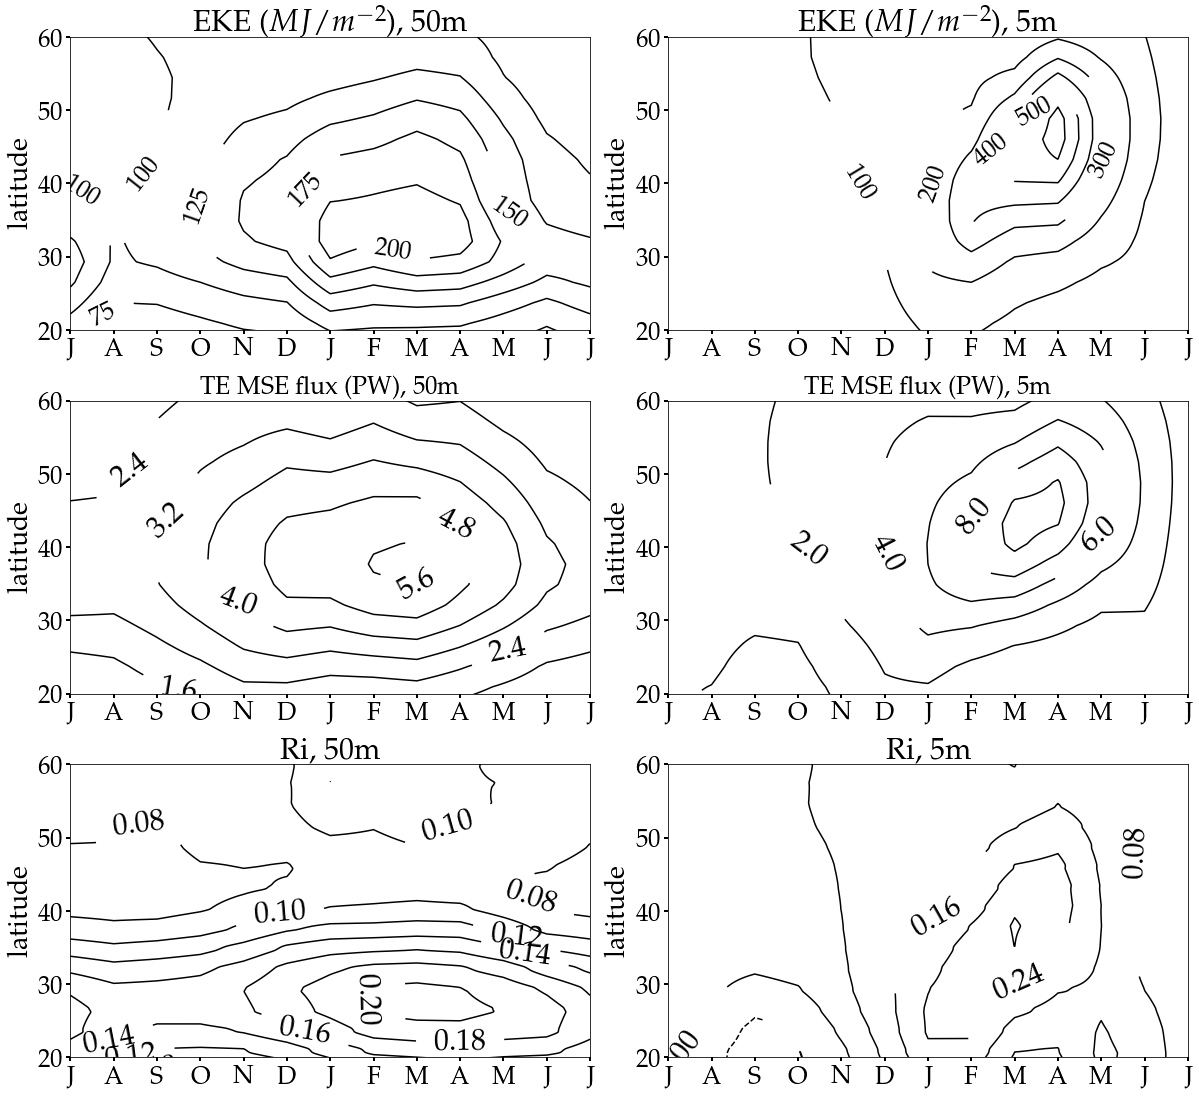

In [39]:
loc=1
# d=0
omega=7.29e-5
sig=sigma_full[loc]/1000
mticks = np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D','J']),6)
mticks2 = (np.array(['J','A','S','O','N','D', 'J','F','M','A','M','J','J']))

depths=depthss

def roll(x):
    y=np.roll(x[...,:-1],6,axis=-1)
    return np.append(y, y[...,0,None],axis=-1)
# py.contour(range(13),  lat_a, roll(TEv_a[0,:,loc,:]),     colors='k'); #py.colorbar()

py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')

py.figure(figsize=(25,25))



# loc=loc-1
d=0
loc=22
n=2;
py.subplot(5,3,n)
# py.contourf(range(13), lat_a, roll(EKEv_a[d,:,loc,:]),cmap=cm.plasma); 
c=py.contour(range(13), lat_a, roll(EKEv_a[d,:,loc,:]),colors='k'); 
py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=20,fontsize=25)
py.xticks(range(13), (mticks2),fontsize=15)
py.ylim(20,60)
py.xticks(range(13), (mticks2),fontsize=15)
py.tick_params(labelsize=25,size=4,width=2)
py.title(r'EKE ($MJ/m^{-2}$), '+str(depths[d]),fontsize=30)
py.ylabel('latitude',fontsize=27)


deno=2*omega*np.sin(np.deg2rad(lat_a[:,None]))
deno[0]=np.nan
deno[-1]=np.nan


py.subplot(5,3,n+3)
# py.contourf(range(13), lat_a, roll(TEv_a[d,:,loc,:]),cmap=rcmap(cm.RdBu)); #py.colorbar()
c=py.contour(range(13), lat_a, roll(TE_a[d,:,:]),colors='k'); #py.colorbar()
py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=20,fontsize=30)
py.xticks(range(13), (mticks2),fontsize=15)
py.ylim(20,60)
py.xticks(range(13), (mticks2),fontsize=15)
py.tick_params(labelsize=25,size=4,width=2)
py.title('TE MSE flux (PW),  '+str(depths[d]),fontsize=25)
py.ylabel('latitude',fontsize=27)


py.subplot(5,3,n+6)
# py.contourf(range(13), lat_a, roll(10*fo_baro_a[0,:,:]/(deno)),30,cmap=cm.seismic); #py.colorbar()
c=py.contour(range(13), lat_a, roll(10*fo_baro_a[d,:,:]/(deno)),30,colors='k'); #py.colorbar()
py.clabel(c,  inline=1,fmt = '%1.2f',inline_spacing=20,fontsize=30)
py.tick_params(labelsize=22,size=4,width=2)
py.title('Ri'+', '+str(depths[d]),fontsize=30)
py.xticks(range(13), (mticks2),fontsize=15)
py.tick_params(labelsize=25,size=4,width=2)
py.ylabel('latitude',fontsize=27)
py.ylim(20,60)
py.tight_layout()

d=1
n=1;
py.subplot(5,3,n)
loc=22
# py.contourf(range(13), lat_a, roll(EKEv_a[d,:,loc,:]),cmap=cm.plasma); 
c=py.contour(range(13), lat_a, roll(EKEv_a[d,:,loc,:]),colors='k'); 
py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=20,fontsize=25)
py.xticks(range(13), (mticks2),fontsize=15)
py.ylim(20,60)
py.xticks(range(13), (mticks2),fontsize=15)
py.tick_params(labelsize=25,size=4,width=2)
py.title(r'EKE ($MJ/m^{-2}$), '+str(depths[d]),fontsize=30)
py.ylabel('latitude',fontsize=27)


deno=2*omega*np.sin(np.deg2rad(lat_a[:,None]))
deno[0]=np.nan
deno[-1]=np.nan


py.subplot(5,3,n+3)
# py.contourf(range(13), lat_a, roll(TEv_a[d,:,loc,:]),cmap=rcmap(cm.RdBu)); #py.colorbar()
c=py.contour(range(13), lat_a, roll(TE_a[d,:,:]),colors='k'); #py.colorbar()
py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=20,fontsize=30)
py.xticks(range(13), (mticks2),fontsize=15)
py.ylim(20,60)
py.xticks(range(13), (mticks2),fontsize=15)
py.tick_params(labelsize=25,size=4,width=2)
py.title('TE MSE flux (PW),  '+str(depths[d]),fontsize=25)
py.ylabel('latitude',fontsize=27)


py.subplot(5,3,n+6)
# py.contourf(range(13), lat_a, roll(10*fo_baro_a[0,:,:]/(deno)),30,cmap=cm.seismic); #py.colorbar()
c=py.contour(range(13), lat_a, roll(10*fo_baro_a[d,:,:]/(deno)),30,colors='k'); #py.colorbar()
py.clabel(c,  inline=1,fmt = '%1.2f',inline_spacing=20,fontsize=30)
py.tick_params(labelsize=22,size=4,width=2)
py.title('Ri'+', '+str(depths[d]),fontsize=30)
py.xticks(range(13), (mticks2),fontsize=15)
py.tick_params(labelsize=25,size=4,width=2)
py.ylabel('latitude',fontsize=27)
py.ylim(20,60)
py.tight_layout()

# py.savefig('Jan25/baroclinic_5m_50m.pdf')

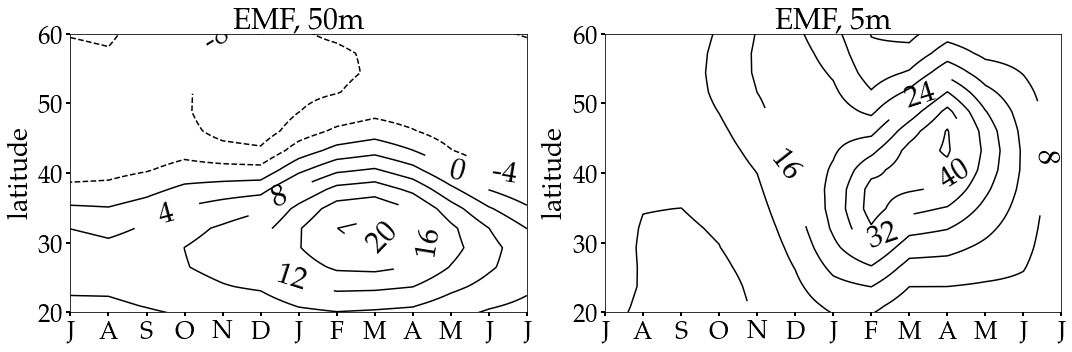

In [40]:
loc=1
# d=0
omega=7.29e-5
sig=sigma_full[loc]/1000
mticks = np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D','J']),6)
mticks2 = (np.array(['J','A','S','O','N','D', 'J','F','M','A','M','J','J']))

depths=depthss

def roll(x):
    y=np.roll(x[...,:-1],6,axis=-1)
    return np.append(y, y[...,0,None],axis=-1)
# py.contour(range(13),  lat_a, roll(TEv_a[0,:,loc,:]),     colors='k'); #py.colorbar()

py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')

py.figure(figsize=(15,5))

emf = EMF_a/10**4

# loc=loc-1
d=0
loc=22
n=2;

d=1
py.subplot(1,2,1)
# py.contourf(range(13), lat_a, roll(10*fo_baro_a[0,:,:]/(deno)),30,cmap=cm.seismic); #py.colorbar()
c=py.contour(range(13), lat_a, roll(emf[d,:,:]),8,colors='k'); #py.colorbar()
py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=20,fontsize=30)
py.tick_params(labelsize=22,size=4,width=2)
py.title('EMF'+', '+str(depths[d]),fontsize=30)
py.xticks(range(13), (mticks2),fontsize=15)
py.tick_params(labelsize=25,size=4,width=2)
py.ylabel('latitude',fontsize=27)
py.ylim(20,60)
py.tight_layout()

d=0
py.subplot(1,2,2)
# py.contourf(range(13), lat_a, roll(10*fo_baro_a[0,:,:]/(deno)),30,cmap=cm.seismic); #py.colorbar()
c=py.contour(range(13), lat_a, roll(emf[d,:,:]),8,colors='k'); #py.colorbar()
py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=20,fontsize=30)
py.tick_params(labelsize=22,size=4,width=2)
py.title('EMF'+', '+str(depths[d]),fontsize=30)
py.xticks(range(13), (mticks2),fontsize=15)
py.tick_params(labelsize=25,size=4,width=2)
py.ylabel('latitude',fontsize=27)
py.ylim(20,60)
py.tight_layout()

# py.savefig('Jan25/baroclinic_5m_50m.pdf')

In [41]:
EMFv_a.shape

(2, 871, 40, 13)

In [42]:
def plot(lev=0):
    emf = EMFv_a[...,lev,:]
    eke = TE_a

    loc=1
    # d=0
    omega=7.29e-5
    sig=sigma_full[loc]/1000
    mticks2 = (np.array(['J','F','M','A','M','J','J','A','S','O','N','D','J']))
    #mticks2 = (np.array(['J','A','S','O','N','D', 'J','F','M','A','M','J','J']))

    depths=depthss

    def roll(x):
        y=np.roll(x[...,:-1],0,axis=-1)
        return np.append(y, y[...,0,None],axis=-1)
    # py.contour(range(13),  lat_a, roll(TEv_a[0,:,loc,:]),     colors='k'); #py.colorbar()

    py.rc('text', usetex=True)
    py.rc('font', family='serif', serif='Palatino',weight='bold')

    py.figure(figsize=(15,10))

    # loc=loc-1
    d=0
    loc=22
    n=2;

    d=1
    py.subplot(2,2,1)
    # py.contourf(range(13), lat_a, roll(10*fo_baro_a[0,:,:]/(deno)),30,cmap=cm.seismic); #py.colorbar()
    c=py.contour(range(13), lat_a, roll(emf[d,:,:]),8,colors='k'); #py.colorbar()
    py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=20,fontsize=25)
    py.tick_params(labelsize=22,size=4,width=2)
    py.title('EMF'+', '+str(depths[d]),fontsize=30)
    py.xticks(range(13), (mticks2),fontsize=15)
    py.tick_params(labelsize=25,size=4,width=2)
    py.ylabel('latitude',fontsize=27)
    py.plot(storm_pos[d,:], 'rs-', lw=3.0 )
    py.ylim(20,80)
    py.tight_layout()

    d=0
    py.subplot(2,2,2)
    # py.contourf(range(13), lat_a, roll(10*fo_baro_a[0,:,:]/(deno)),30,cmap=cm.seismic); #py.colorbar()
    c=py.contour(range(13), lat_a, roll(emf[d,:,:]),8,colors='k'); #py.colorbar()
    py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=20,fontsize=25)
    py.tick_params(labelsize=22,size=4,width=2)
    py.title('EMF'+', '+str(depths[d]),fontsize=30)
    py.xticks(range(13), (mticks2),fontsize=15)
    py.tick_params(labelsize=25,size=4,width=2)
    py.ylabel('latitude',fontsize=27)
    py.plot(storm_pos[d,:], 'rs-', lw=3.0 )
    py.ylim(20,80)

        
    d=1
    py.subplot(2,2,3)
    # py.contourf(range(13), lat_a, roll(10*fo_baro_a[0,:,:]/(deno)),30,cmap=cm.seismic); #py.colorbar()
    c=py.contour(range(13), lat_a, roll(eke[d,:,:]),8,colors='k'); #py.colorbar()
    py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=20,fontsize=25)
    py.tick_params(labelsize=22,size=4,width=2)
    py.title('EKE'+', '+str(depths[d]),fontsize=30)
    py.xticks(range(13), (mticks2),fontsize=15)
    py.tick_params(labelsize=25,size=4,width=2)
    py.ylabel('latitude',fontsize=27)
    py.plot(storm_pos[d,:], 'rs-', lw=3.0 )
    py.ylim(20,80)
    py.tight_layout()

    d=0
    py.subplot(2,2,4)
    # py.contourf(range(13), lat_a, roll(10*fo_baro_a[0,:,:]/(deno)),30,cmap=cm.seismic); #py.colorbar()
    c=py.contour(range(13), lat_a, roll(eke[d,:,:]),8,colors='k'); #py.colorbar()
    py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=20,fontsize=25)
    py.tick_params(labelsize=22,size=4,width=2)
    py.title('EKE'+', '+str(depths[d]),fontsize=30)
    py.xticks(range(13), (mticks2),fontsize=15)
    py.tick_params(labelsize=25,size=4,width=2)
    py.ylabel('latitude',fontsize=27)
    py.plot(storm_pos[d,:], 'rs-', lw=3.0 )
    py.ylim(20,80)
    py.tight_layout()

    # py.savefig('Jan25/baroclinic_5m_50m.pdf')

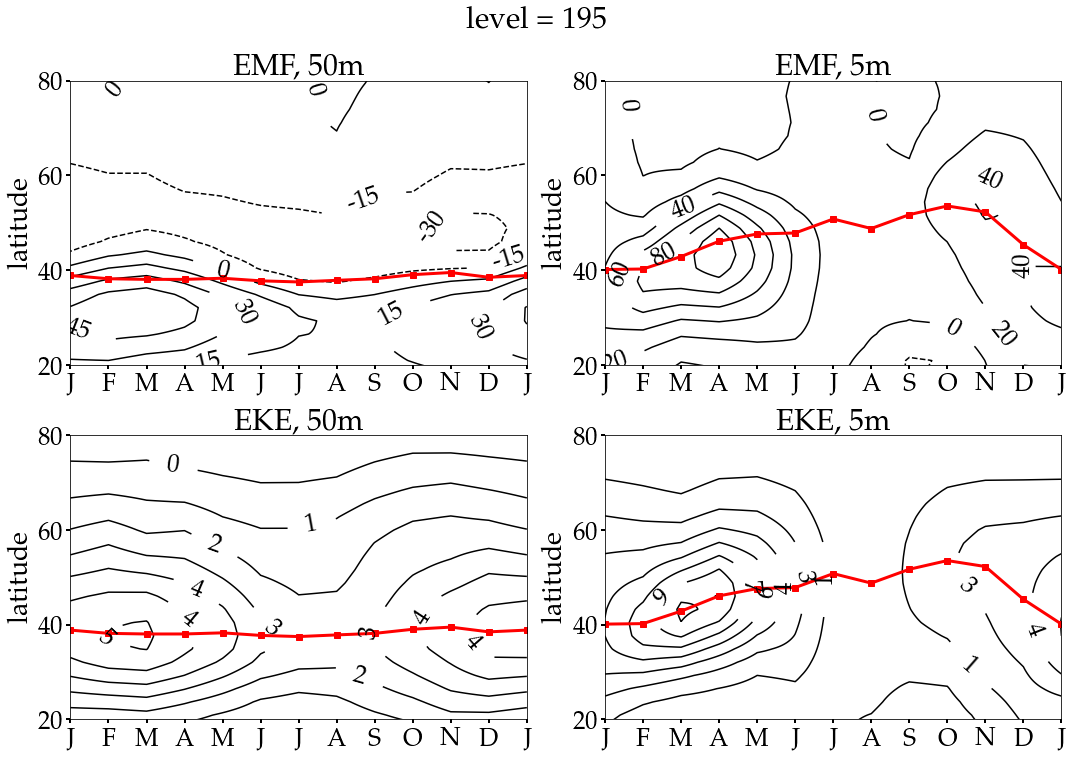

In [44]:
l=24
plot(lev=l)
py.suptitle("level = %1d"%(sigma_full[l]), fontsize=30, y=1.05)
py.show()

In [45]:
g=10
import scipy.integrate as integrate 
dp_by_g= ((sigma_half[1:]-sigma_half[:-1])*100/g)[None,None,:,None]
def Vdpg():
    dp_by_g= ((sigma_half[1:]-sigma_half[:-1])*100/g)[None,None,:,None]
    int_x_r=integrate.cumtrapz(V_a[...,::-1,:],  dp_by_g[...,::-1,:],  axis = -2, initial = None) #  (This is basically integration from + 90 deg) 
    return int_x_r[...,::-1,:]/10**9

g=10
stream = (Vdpg())*(2*np.pi*a*np.cos(np.deg2rad(lat_a[None,:,None,None]))) - ((Vdpg())*(2*np.pi*a*np.cos(np.deg2rad(lat_a[None,:,None,None]))))[:,:,0,None,:]

In [46]:
# py.figure(figsize=(15,3))
# l=0
# YY=stream[:,:,l,:]
# py.subplot(1,3,1)
# py.contourf(range(13), lat_a, YY[0,...], np.arange(-20,22,2) ,cmap=cm.RdBu_r); py.colorbar(); py.title("%1d"%sigma_full[l])

# l=10
# YY=stream[:,:,l,:]
# py.subplot(1,3,2)
# py.contourf(range(13), lat_a, YY[0,...], np.arange(-20,22,2) ,cmap=cm.RdBu_r); py.colorbar(); py.title("%1d"%sigma_full[l])

# l=23
# YY=stream[:,:,l,:]
# py.subplot(1,3,3)
# py.contourf(range(13), lat_a, YY[0,...], np.arange(-20,22,2) ,cmap=cm.RdBu_r); py.colorbar(); py.title("%1d"%sigma_full[l])

In [47]:
Cp=1000; L=2260*1000; g=10
MSE_a = (Cp*T_a+g*Z_a+L*Q_a)#/10**5

In [48]:
def spher_div2(x,lat=lat_a):
       N=100
       fac= np.cos(np.radians(lat))**2
       div=np.copy(x)
       for d in range(len(DEPTHS)):
        for m in range(13):
           div[d,:,m]= smooth( np.gradient((x[d,:,m])*(fac),dtheta)/( R* ( np.cos(np.radians(lat_a[:])) )**2 ) ,N)
       return div


In [133]:
def spher_div4(x,lat=lat_a):
       N=100
       fac= np.cos(np.radians(lat))
       div=np.copy(x)
       for d in range(len(DEPTHS)):
        for p in range(40):
            for m in range(13):
               div[d,:,p,m]= smooth( np.gradient((x[d,:,p,m])*(fac),dtheta)/( R* ( np.cos(np.radians(lat_a[:])) ) ) ,N)
       return div


In [135]:
rel_vort = 2*np.pi*R*np.array([spher_div(U_a[...,lev,:]) for lev in range(0,len(sigma_full))]).transpose(1,2,0,3)

In [49]:
div_EMF = np.array([spher_div2(EMFv_a[...,lev,:]) for lev in range(0,len(sigma_full))]).transpose(1,2,0,3)

In [50]:
P_emf_v     = np.array([inerp_at_max(EMFv_a[...,lev,:],lat_a) for lev in range(0, len(sigma_full))]).transpose(1,0,2)
P_div_emf_v = np.array([inerp_at_max(div_EMF[...,lev,:],lat_a) for lev in range(0, len(sigma_full))]).transpose(1,0,2)
P_eke_v     = np.array([inerp_at_max(EMFv_a[...,lev,:],lat_a) for lev in range(0, len(sigma_full))]).transpose(1,0,2)
P_TE_v      = np.array([inerp_at_max(TEv_a[...,lev,:],lat_a) for lev in range(0, len(sigma_full))]).transpose(1,0,2)
P_V_v       = np.array([inerp_at_max(V_a[...,lev,:],lat_a) for lev in range(0, len(sigma_full))]).transpose(1,0,2)
P_U_v       = np.array([inerp_at_max(U_a[...,lev,:],lat_a) for lev in range(0, len(sigma_full))]).transpose(1,0,2)
P_stream_v  = np.array([inerp_at_max(stream[...,lev,:],lat_a) for lev in range(0, len(sigma_full[1:]))]).transpose(1,0,2)
P_mse_v     = np.array([inerp_at_max(MSE_a[...,lev,:],lat_a) for lev in range(0, len(sigma_full))]).transpose(1,0,2)
P_MM_v      = np.array([inerp_at_max(MMv_a[...,lev,:],lat_a) for lev in range(0, len(sigma_full))]).transpose(1,0,2)

P_CpT_v     = np.array([inerp_at_max(Cp*T_a[...,lev,:],lat_a) for lev in range(0, len(sigma_full))]).transpose(1,0,2)
P_Lq_v     = np.array([inerp_at_max(L*Q_a[...,lev,:],lat_a) for lev in range(0, len(sigma_full))]).transpose(1,0,2)
P_gZ_v     = np.array([inerp_at_max(g*Z_a[...,lev,:],lat_a) for lev in range(0, len(sigma_full))]).transpose(1,0,2)


In [51]:
Intensity_ne.shape
#print sigma_full[30]

(2, 13)

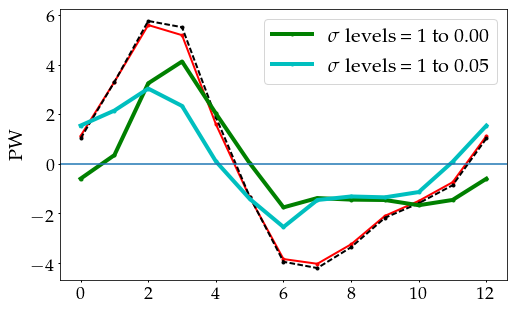

In [52]:
def M(y):
    return y-y[:-1].mean()

py.figure(figsize=(8,5))
lev=-10
py.plot(M(P_TE_v[0,0:lev,:].sum(axis=0)), 'r.-', lw=2)
lev=-1
py.plot(M(P_TE_v[0,0:lev,:].sum(axis=0)), 'k.--', lw=2)
# py.plot(M(Intensity_ne[0,:]), 'm.-', lw=2)
lev=-1
py.plot(M(-P_MM_v[0,0:lev,:].sum(axis=0)), 'g.-', lw=4, label=r"$\sigma$ levels = 1 to %1.2f" %(sigma_full[lev]/1000.0))
lev=-10
py.plot(M(-P_MM_v[0,0:lev,:].sum(axis=0)), 'c.-', lw=4, label=r"$\sigma$ levels = 1 to %1.2f" %(sigma_full[lev]/1000.0))
py.tick_params(labelsize=18,size=2,width=1)
py.ylabel("PW", fontsize=20)
py.axhline(0)
py.legend(loc='best', fontsize=20)

## Find at max EMF convergence

In [53]:
sum_div_EMF = div_EMF.sum(axis=2)*10**5

In [54]:
lin = (lat_a>20) & (lat_a<70)
min_div_EMF = np.zeros((2,13))
for d in range(2):
    for m in range(13):
       min_div_EMF[d,m] = np.min(sum_div_EMF[d,lin,m])      

In [55]:
def find_emf_conv_max(div):
  zero_loc = np.zeros((len(DEPTHS),13))
  for d in range(0,len(DEPTHS)):
      for m in range(0,13):
              l_range=((lat_a>=20)&(lat_a<=90))
              interpolation_function = interp1d(div[d,l_range,m],lat_a[l_range],kind='linear')
              try :
                  zero_loc[d,m]=interpolation_function(min_div_EMF[d,m])
              except ValueError as err:
                  zero_loc[d,m]=np.nan        
  return zero_loc
min_div_EMF_pos = find_emf_conv_max(sum_div_EMF)

In [56]:
def inerp_at_emf_conv(flux,lat):
  D = np.zeros((len(DEPTHS),13))
  for d in range(0,len(DEPTHS)):
        for m in range(0,13):
                l_range=((lat>=20) & (lat<=70)) 
                X=min_div_EMF_pos
                interpolation_function = interp1d(lat[l_range],flux[d,l_range,m],kind='cubic')
                try :
                    D[d,m]=interpolation_function(X[d,m])
                except ValueError as err:
                    D[d,m]==np.nan        
  return D

In [57]:
E_emf_v     = np.array([inerp_at_emf_conv(EMFv_a[...,lev,:],lat_a) for lev in range(0, len(sigma_full))]).transpose(1,0,2)
E_div_emf_v = np.array([inerp_at_emf_conv(div_EMF[...,lev,:],lat_a) for lev in range(0, len(sigma_full))]).transpose(1,0,2)
E_eke_v     = np.array([inerp_at_emf_conv(EMFv_a[...,lev,:],lat_a) for lev in range(0, len(sigma_full))]).transpose(1,0,2)
E_TE_v      = np.array([inerp_at_emf_conv(TEv_a[...,lev,:],lat_a) for lev in range(0, len(sigma_full))]).transpose(1,0,2)
E_V_v       = np.array([inerp_at_emf_conv(V_a[...,lev,:],lat_a) for lev in range(0, len(sigma_full))]).transpose(1,0,2)
E_U_v       = np.array([inerp_at_emf_conv(U_a[...,lev,:],lat_a) for lev in range(0, len(sigma_full))]).transpose(1,0,2)
E_stream_v  = np.array([inerp_at_emf_conv(stream[...,lev,:],lat_a) for lev in range(0, len(sigma_full[1:]))]).transpose(1,0,2)
E_mse_v     = np.array([inerp_at_emf_conv(MSE_a[...,lev,:],lat_a) for lev in range(0, len(sigma_full))]).transpose(1,0,2)
E_MM_v      = np.array([inerp_at_emf_conv(MMv_a[...,lev,:],lat_a) for lev in range(0, len(sigma_full))]).transpose(1,0,2)

E_CpT_v     = np.array([inerp_at_emf_conv(Cp*T_a[...,lev,:],lat_a) for lev in range(0, len(sigma_full))]).transpose(1,0,2)
E_Lq_v      = np.array([inerp_at_emf_conv(L*Q_a[...,lev,:],lat_a) for lev in range(0, len(sigma_full))]).transpose(1,0,2)
E_gZ_v      = np.array([inerp_at_emf_conv(g*Z_a[...,lev,:],lat_a) for lev in range(0, len(sigma_full))]).transpose(1,0,2)


In [58]:
MMv_a.shape
P_U_v.shape

def draw_MM1(ax,d):
    ax2 = ax.twinx()
    ax2.plot(range(13), Intensity_mm[d,:], 'k-', lw=3)
    ax2.set_ylim(-25,25)
    py.axhline(0)
    py.xlim(0,12)
    
def draw_MM2(ax,d,si,sf,flag=1, c='g'):
    ax2 = ax.twinx()
#     Intensity_mm2=inerp_at_max(MMv_a.sum(axis=2),lat_a)
    ax2.plot(range(13), flag*inerp_at_max(MMv_a[:,:,si:sf,:].sum(axis=2),lat_a)[d,:], c+'-', lw=2)
#     ax2.plot(range(13), Intensity_mm2[d,:], 'g--', lw=2)
    ax2.set_ylim(0,32)
    py.xlim(0,12)
    
# def draw_MM2(ax,d,si,sf,flag=1, c='g'):
#     ax2 = ax.twinx()
#     ax2.plot(range(13), flag*P_MM_v[:,si:sf].sum(axis=1)[d,:], c+'-', lw=2)
#     ax2.set_ylim(0,32)
# #     py.axhline(0)
#     py.xlim(0,12)

### Height vs month at storm track latitude

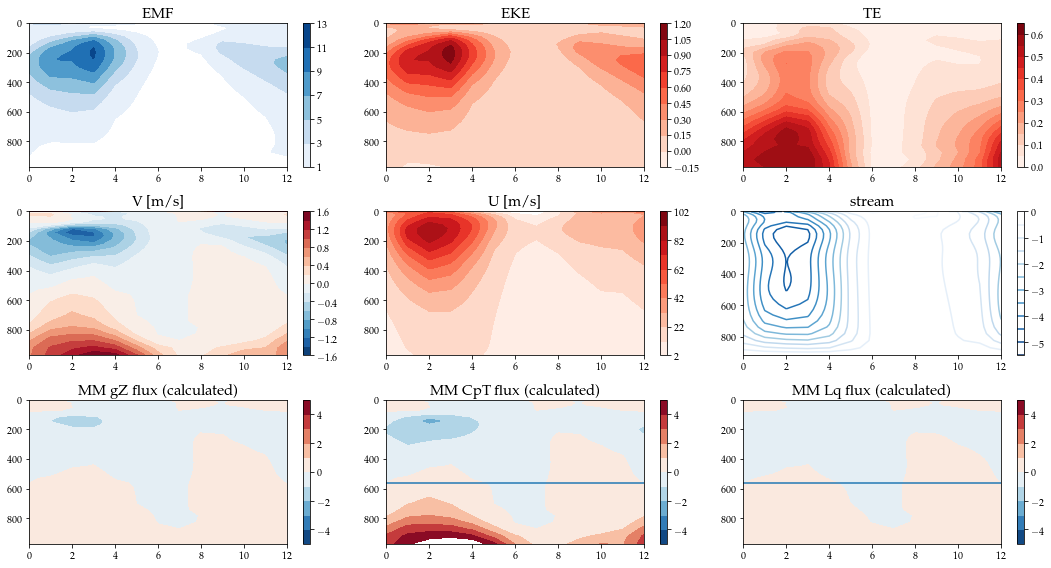

In [59]:
d=0; sf=-1; si=0; inter=10
dp_by_g= (100*(sigma_half[1:]-sigma_half[:-1])/g)[None,:,None]
py.figure(figsize=(15,8))
ax1=py.subplot(3,3,1)
py.contourf(range(13), sigma_full[:sf], P_emf_v[d,:sf,:]/10, np.arange(1,14,2), cmap=cm.Blues) ; py.colorbar() ; 
py.title("EMF", fontsize=15)
py.gca().invert_yaxis()
py.subplot(3,3,2) 
py.contourf(range(13), sigma_full[:sf],    P_eke_v[d,:sf,:]/100, cmap=cm.Reds); py.colorbar()
py.title("EKE", fontsize=15)
py.gca().invert_yaxis()
py.subplot(3,3,3)
py.contourf(range(13), sigma_full[:sf],    P_TE_v[d,:sf,:], np.arange(0,0.7,0.05), cmap=cm.Reds) ; py.colorbar()
py.title("TE", fontsize=15)
py.gca().invert_yaxis()
py.subplot(3,3,4)
py.contourf(range(13), sigma_full[:sf],    P_V_v[d,:sf,:], np.arange(-1.6,1.8,0.2),cmap=cm.RdBu_r) ; py.colorbar()
py.title("V [m/s]", fontsize=15)
py.gca().invert_yaxis()
py.subplot(3,3,5)
py.contourf(range(13), sigma_full[:sf],    P_U_v[d,:sf,:], np.arange(2,105,10), cmap=cm.Reds) ; py.colorbar()
py.title("U [m/s]", fontsize=15)
py.gca().invert_yaxis()
py.subplot(3,3,6)
py.contour(range(13), sigma_full[1:sf],    -P_stream_v[d,:sf,:], -np.arange(0,6,0.5)[::-1], cmap=cm.Blues_r) ; py.colorbar()
py.title("stream", fontsize=15)
py.gca().invert_yaxis()
py.subplot(3,3,7)
py.contourf(range(13), sigma_full[:sf],    2*np.pi*R*np.cos(np.deg2rad(storm_pos[d,None,:]))*(-P_V_v*dp_by_g*P_gZ_v)[d,:sf,:]/10**15, np.arange(-5,6,1), cmap=cm.RdBu_r) ; py.colorbar()
py.title("MM gZ flux (calculated)", fontsize=15)
py.gca().invert_yaxis()
ax1=py.subplot(3,3,8)
py.contourf(range(13), sigma_full[:sf],    2*np.pi*R*np.cos(np.deg2rad(storm_pos[d,None,:]))*(-P_V_v*dp_by_g*P_CpT_v)[d,:sf,:]/10**15,  np.arange(-5,6,1), cmap=cm.RdBu_r) ; py.colorbar()
py.title("MM CpT flux (calculated)", fontsize=15)
py.gca().invert_yaxis()
py.axhline(sigma_full[inter])
ax1=py.subplot(3,3,9)
py.contourf(range(13), sigma_full[:sf],    2*np.pi*R*np.cos(np.deg2rad(storm_pos[d,None,:]))*(-P_V_v*dp_by_g*P_Lq_v)[d,:sf,:]/10**15, np.arange(-5,6,1), cmap=cm.RdBu_r) ; py.colorbar()
py.title("MM Lq flux (calculated)", fontsize=15)
py.gca().invert_yaxis()
py.axhline(sigma_full[inter])
py.tight_layout()

### Height vs month at latitude of max EMF convergence

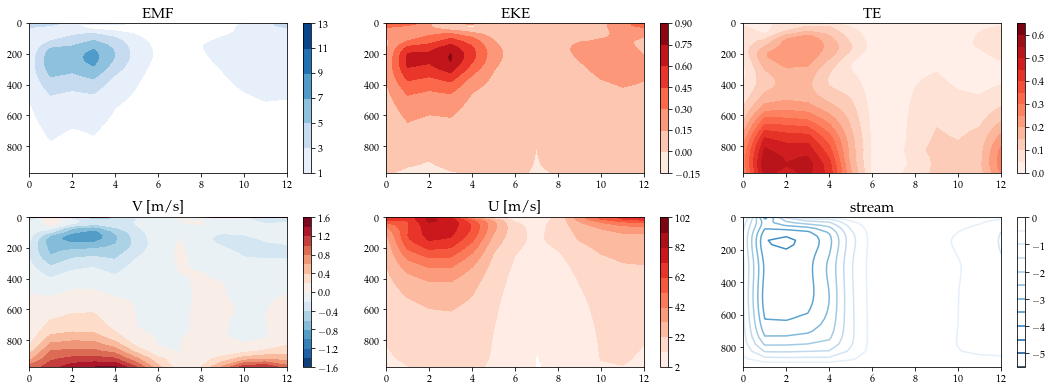

In [60]:
d=0; sf=-1; si=0; inter=10
dp_by_g= (100*(sigma_half[1:]-sigma_half[:-1])/g)[None,:,None]
py.figure(figsize=(15,8))
ax1=py.subplot(3,3,1)
py.contourf(range(13), sigma_full[:sf], E_emf_v[d,:sf,:]/10, np.arange(1,14,2), cmap=cm.Blues) ; py.colorbar() ; 
py.title("EMF", fontsize=15)
py.gca().invert_yaxis()
py.subplot(3,3,2)
py.contourf(range(13), sigma_full[:sf], E_eke_v[d,:sf,:]/100, cmap=cm.Reds); py.colorbar()
py.title("EKE", fontsize=15)
py.gca().invert_yaxis()
py.subplot(3,3,3)
py.contourf(range(13), sigma_full[:sf],     E_TE_v[d,:sf,:], np.arange(0,0.7,0.05), cmap=cm.Reds) ; py.colorbar()
py.title("TE", fontsize=15)
py.gca().invert_yaxis()
py.subplot(3,3,4)
py.contourf(range(13), sigma_full[:sf],       E_V_v[d,:sf,:], np.arange(-1.6,1.8,0.2),cmap=cm.RdBu_r) ; py.colorbar()
py.title("V [m/s]", fontsize=15)
py.gca().invert_yaxis()
py.subplot(3,3,5)
py.contourf(range(13), sigma_full[:sf],       E_U_v[d,:sf,:], np.arange(2,105,10), cmap=cm.Reds) ; py.colorbar()
py.title("U [m/s]", fontsize=15)
py.gca().invert_yaxis()
py.subplot(3,3,6)
py.contour(range(13), sigma_full[1:sf], -E_stream_v[d,:sf,:], -np.arange(0,6,0.5)[::-1], cmap=cm.Blues_r) ; py.colorbar()
py.title("stream", fontsize=15)
py.gca().invert_yaxis()

py.tight_layout()

### Upper and lower MM MSE flux and meridional wind at storm track position

In [61]:
def plot_up_low_MM_V_at_storm(d):
    def draw_MM_down(ax,d,si,sf,flag=1, c='g', field = MMv_a, l1=-31, l2=0, label='surface'):
        ax2 = ax
        ax2.tick_params(axis='y', labelcolor=c,labelsize=12)
        ax2.plot(range(13), flag*inerp_at_max(field[:,:,si:sf,:].sum(axis=2),lat_a)[d,:], c+'-', lw=2, label=label)
        ax2.set_ylim(l1,l2)
        py.xlim(0,12)
        py.tick_params(labelsize=15,size=2,width=1)

    def draw_MM_up(ax,d,si,sf,flag=1, c='g', field = MMv_a, l1=-31, l2=0, label='surface'):
        ax2 = ax.twinx()
        ax2.tick_params(axis='y', labelcolor=c,labelsize=12)
        ax2.plot(range(13), flag*inerp_at_max(field[:,:,si:sf,:].sum(axis=2),lat_a)[d,:], c+'-', lw=2, label=label)
        ax2.set_ylim(l1,l2)
        py.xlim(0,12)
        py.tick_params(labelsize=15,size=2,width=1)

    def draw_MM_sum(ax,d,s1=0, s2=12, s3=-9,flag=1, c='g', label='surface - upper'):
        ax2 = ax.twinx()
        ax2.tick_params(axis='y', labelcolor=c,labelsize=12)
        mm_up     = flag*inerp_at_max(MMv_a[:,:,s1:s2,:].sum(axis=2),lat_a)
        mm_down   = flag*inerp_at_max(MMv_a[:,:,s2:s3,:].sum(axis=2),lat_a)                        
        ax2.plot(range(13), (mm_up+mm_down)[d,:], c+'.-', lw=2, label=label)
        ax2.set_ylim(-6,6)
        py.xlim(0,12)
        py.tick_params(labelsize=15,size=2,width=1)

    sf=-1; si=0; inter=12
    dp_by_g= (100*(sigma_half[1:]-sigma_half[:-1])/g)[None,:,None]
    py.figure(figsize=(12,8))
    ax1=py.subplot(2,2,1)
    py.contourf(range(13), sigma_full[:sf]/1000.0,  P_MM_v[d,:sf,:], np.arange(-6.5,7.5,1), cmap=cm.RdBu_r)
    c=py.contour(range(13), sigma_full[:sf]/1000.0,  P_MM_v[d,:sf,:], np.arange(-6.5,7.5,1), colors='k') ; #py.colorbar()
    py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=10,fontsize=15)
    py.gca().invert_yaxis()
    py.axhline(sigma_full[12]/1000.0)
    py.axhline(sigma_full[-9]/1000.0)
    py.ylim(sigma_full[0]/1000.0, sigma_full[-1]/1000.0)
    # py.yscale('log')
    py.tick_params(labelsize=15,size=2,width=1)
    py.ylabel(r"$\sigma$", fontsize=21)
    py.title("MM MSE flux ", fontsize=19)

    ax1=py.subplot(2,2,2)
    draw_MM_down(ax1,d,si=0, sf=12,flag=1, c='r', l1=0, l2=32,    label="surface to mid-tropo") ## surface
    py.ylabel("Lower level \n poleward [PW]", fontsize=19, color='r')
    py.legend(loc='best', fontsize=15, ncol=1)
    draw_MM_up(ax1,d,si=12, sf=-1,flag=1, c='b', l1=-32, l2=0,    label="mid-tropo to TOA") ## upper
    py.ylabel("Lower level \n equatorward [PW]", fontsize=19, color='b')
    py.gca().invert_yaxis()
    py.legend(loc='center right', fontsize=15)
    py.title("MM MSE flux [PW]", fontsize=19)

    ax1=py.subplot(2,2,3)
    py.contourf(range(13), sigma_full[:sf]/1000.0,  P_V_v[d,:sf,:], np.arange(-1.6,2.0,0.4), cmap=cm.RdBu_r); #py.colorbar()
    c=py.contour(range(13), sigma_full[:sf]/1000.0,  P_V_v[d,:sf,:], np.arange(-1.6,2.0,0.4), colors='k') ; #py.colorbar()
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=10,fontsize=15)
    py.gca().invert_yaxis()
    py.axhline(sigma_full[1]/1000.0, color='r')
    py.axhline(sigma_full[24]/1000.0, color='b')
    py.ylim(sigma_full[0]/1000.0, sigma_full[-1]/1000.0)
    # py.yscale('log')
    py.ylabel(r"$\sigma$", fontsize=21)
    py.tick_params(labelsize=15,size=2,width=1)
    py.title("V [m/s] ", fontsize=19)

    ax1=py.subplot(2,2,4)
    draw_MM_down(ax1,d,si=1,sf=2,flag=1, c='r', field=V_a, l1=0,l2=1.5, label=r"$\sigma$ = %1.2f "%(sigma_full[1]/1000.0)) # surface
    py.ylabel("Lower level \n poleward wind [m/s]", fontsize=19, color='r')
    py.legend(loc='best', fontsize=15)
    draw_MM_up(ax1,d,si=24,sf=25,flag=1, c='b', field=V_a, l1=-1.5,l2=0, label=r"$\sigma$ =%1.2f "%(sigma_full[24]/1000.0)) # up
    py.gca().invert_yaxis()
    py.ylabel("Upper level \n equatorward wind [m/s]", fontsize=19, color='b')
    py.legend(loc='center right', fontsize=15)
    py.title("V [m/s]", fontsize=19)
    
    py.suptitle((depths[d]), fontsize=25, y=1.02)
    py.tight_layout()

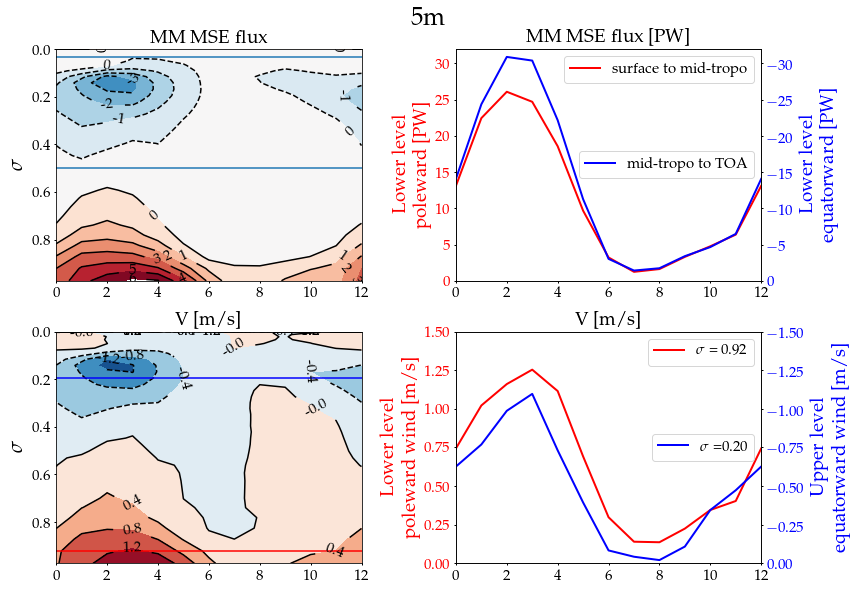

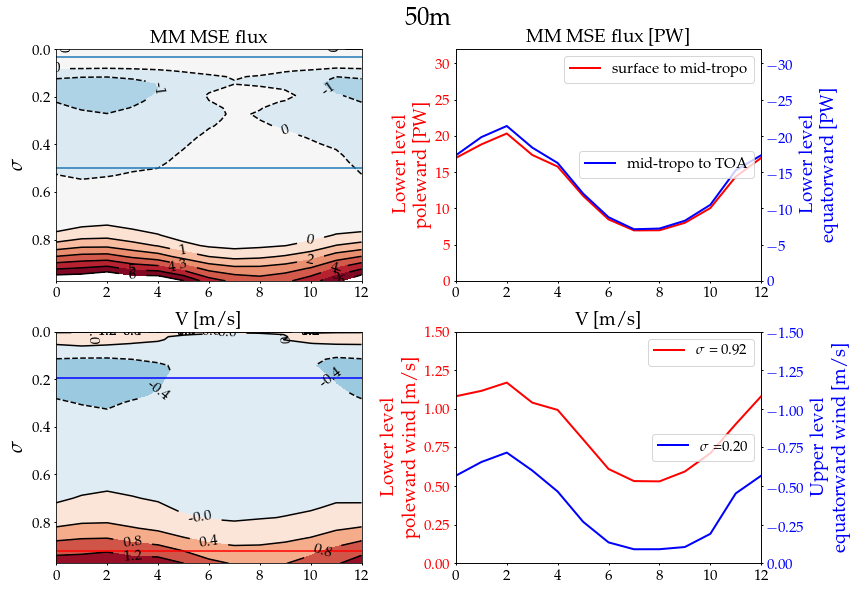

In [62]:
plot_up_low_MM_V_at_storm(0)
plot_up_low_MM_V_at_storm(1)

## Upper and lower EMF flux divergence and zonal wind at max EMF flux convergence

In [63]:
def plot_up_low_divEMF_U_at_EMF(d):
    
    def draw_MM_down(ax,d,si,sf,flag=1, c='g', field = div_EMF*10**5, l1=-31, l2=0, label='surface'):
        ax2 = ax
        ax2.tick_params(axis='y', labelcolor=c,labelsize=12)
        ax2.plot(range(13), flag*inerp_at_emf_conv(field[:,:,si:sf,:].sum(axis=2),lat_a)[d,:], c+'-', lw=2, label=label)
        ax2.set_ylim(l1,l2)
        py.xlim(0,12)
        py.tick_params(labelsize=15,size=2,width=1)

    def draw_MM_up(ax,d,si,sf,flag=1, c='g', field = div_EMF*10**5, l1=-31, l2=0, label='surface'):
        ax2 = ax.twinx()
        ax2.tick_params(axis='y', labelcolor=c,labelsize=12)
        ax2.plot(range(13), flag*inerp_at_emf_conv(field[:,:,si:sf,:].sum(axis=2),lat_a)[d,:], c+'-', lw=2, label=label)
        ax2.set_ylim(l1,l2)
        py.xlim(0,12)
        py.tick_params(labelsize=15,size=2,width=1)

    def draw_MM_sum(ax,d,s1=0, s2=12, s3=-9,flag=1, c='g', label='surface - upper'):
        ax2 = ax.twinx()
        ax2.tick_params(axis='y', labelcolor=c,labelsize=12)
        mm_up     = flag*inerp_at_emf_conv(div_EMF[:,:,s1:s2,:].sum(axis=2),lat_a)
        mm_down   = flag*inerp_at_emf_conv(div_EMF[:,:,s2:s3,:].sum(axis=2),lat_a)                        
        ax2.plot(range(13), (mm_up+mm_down)[d,:], c+'.-', lw=2, label=label)
        ax2.set_ylim(-6,6)
        py.xlim(0,12)
        py.tick_params(labelsize=15,size=2,width=1)



    sf=-1; si=0; inter=12
    dp_by_g= (100*(sigma_half[1:]-sigma_half[:-1])/g)[None,:,None]
    py.figure(figsize=(12,8))
    ax1=py.subplot(2,2,1)
    py.contourf(range(13), sigma_full[:sf]/1000.0,   E_div_emf_v[d,:sf,:]*10**5,  np.arange(-10,2,2) ,cmap=cm.Blues_r)
    c=py.contour(range(13), sigma_full[:sf]/1000.0,  E_div_emf_v[d,:sf,:]*10**5,  np.arange(-10,2,2) ,colors='k') ; #py.colorbar()
    py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=10,fontsize=15)
    py.gca().invert_yaxis()
    py.axhline(sigma_full[12]/1000.0)
    py.axhline(sigma_full[-9]/1000.0)
    py.ylim(sigma_full[0]/1000.0, sigma_full[-1]/1000.0)
    # py.yscale('log')
    py.tick_params(labelsize=15,size=2,width=1)
    py.ylabel(r"$\sigma$", fontsize=21)
    py.title(r"EMF flux convergence [x 10$^{13}$]", fontsize=19)

    ax1=py.subplot(2,2,2)
    draw_MM_down(ax1,d,si=1, sf=2,flag=1, c='r', l1=-10, l2=0,    label=r"$\sigma$ =%1.1f "%(sigma_full[1]/1000.0)) ## surface
    py.ylabel("Lower level \n poleward [PW]", fontsize=19, color='r')
    py.gca().invert_yaxis()
    py.legend(loc='best', fontsize=15, ncol=1)
    draw_MM_up(ax1,d,si=24, sf=25,flag=1, c='b',  l1=-10, l2=0,    label=r"$\sigma$ =%1.1f "%(sigma_full[24]/1000.0)) ## upper
    py.ylabel("Lower level \n equatorward [PW]", fontsize=19, color='b')
    py.gca().invert_yaxis()
    py.legend(loc='center right', fontsize=15)
    py.title(r"EMF flux convergence [x 10$^{13}$]", fontsize=19)

    ax1=py.subplot(2,2,3)
    py.contourf(range(13), sigma_full[:sf]/1000.0,  E_U_v[d,:sf,:],  np.arange(0,100,5), cmap=cm.Reds); #py.colorbar()
    c=py.contour(range(13), sigma_full[:sf]/1000.0,  E_U_v[d,:sf,:],  np.arange(0,100,5), colors='k') ; #py.colorbar()
    py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=10,fontsize=15)
    py.gca().invert_yaxis()
    py.axhline(sigma_full[1]/1000.0, color='r')
    py.axhline(sigma_full[24]/1000.0, color='b')
    py.ylim(sigma_full[0]/1000.0, sigma_full[-1]/1000.0)
    # py.yscale('log')
    py.ylabel(r"$\sigma$", fontsize=21)
    py.tick_params(labelsize=15,size=2,width=1)
    py.title("U [m/s] ", fontsize=19)

    ax1=py.subplot(2,2,4)
    draw_MM_down(ax1,d,si=1,sf=2,flag=1, c='r', field=U_a, l1=0,l2=70, label=r"$\sigma$ = %1.1f "%(sigma_full[1]/1000.0)) # surface
    py.ylabel("Lower level \n westerlies [m/s]", fontsize=19, color='r')
    py.legend(loc='best', fontsize=15)
    draw_MM_up(ax1,d,si=24,sf=25,flag=1, c='b', field=U_a, l1=0,l2=70, label=r"$\sigma$ = %1.1f "%(sigma_full[24]/1000.0)) # up
    py.ylabel("Upper level \n westerlies [m/s]", fontsize=19, color='b')
    py.legend(loc='center right', fontsize=15)
    py.title("U [m/s]", fontsize=19)

    py.suptitle((depths[d]), fontsize=25, y=1.02)
    py.tight_layout()

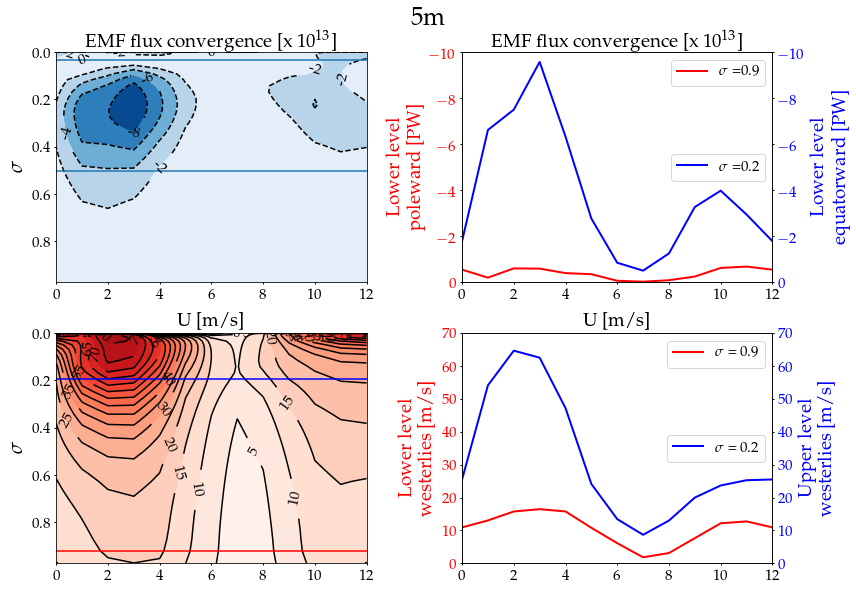

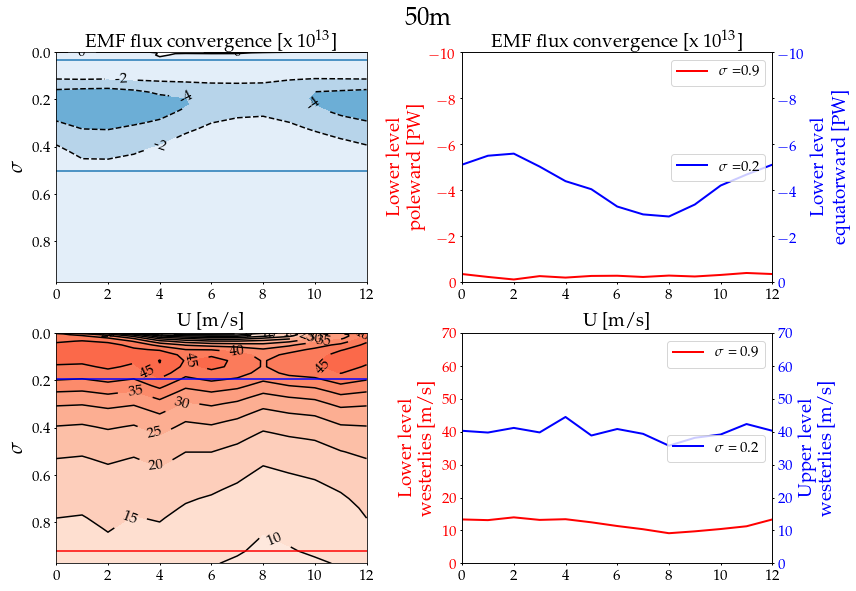

In [64]:
plot_up_low_divEMF_U_at_EMF(0)
plot_up_low_divEMF_U_at_EMF(1)

## Upper and lower EMF flux divergence and zonal wind at max EMF flux convergence (shifted)

In [65]:
def plot_up_low_divEMF_U_at_EMF_shifted(d=0, L2=60, L1=-32):
    roll=6
    mticks2 = ['J','F','M','A','M','J','J','A','S','O','N','D']
    def draw_MM_down(ax,d,si,sf,flag=1, c='g', field = div_EMF*10**5, l1=-10, l2=0, label='surface'):
        ax2 = ax
        ax2.tick_params(axis='y', labelcolor=c,labelsize=12)
    #     ax2.plot(np.roll(range(13),roll), np.roll(flag*inerp_at_emf_conv(field[:,:,si:sf,:].sum(axis=2),lat_a)[d,:],roll), c+'-', lw=2, label=label)
        ax2.plot(np.roll(flag*inerp_at_emf_conv(field[:,:,si:sf,:].sum(axis=2),lat_a)[d,:-1],roll), c+'o-', lw=2, label=label)
        ax2.set_ylim(l1,l2)
        py.xlim(0,11)
        py.xticks(range(12),np.roll(mticks2,roll))
        py.tick_params(labelsize=15,size=2,width=1)

    def draw_MM_up(ax,d,si,sf,flag=1, c='g', field = div_EMF*10**5, l1=-10, l2=0, label='surface'):
        ax2 = ax.twinx()
        ax2.tick_params(axis='y', labelcolor=c,labelsize=12)
    #     ax2.plot(np.roll(range(13),roll), np.roll(flag*inerp_at_emf_conv(field[:,:,si:sf,:].sum(axis=2),lat_a)[d,:],roll), c+'-', lw=2, label=label)
        ax2.plot( np.roll(flag*inerp_at_emf_conv(field[:,:,si:sf,:].sum(axis=2),lat_a)[d,:-1],roll), c+'o-', lw=2, label=label)
        ax2.set_ylim(l1,l2)
        py.xlim(0,11)
        py.xticks(range(12),np.roll(mticks2,roll))
        py.tick_params(labelsize=15,size=2,width=1)

    def draw_MM_sum(ax,d,s1=0, s2=12, s3=-9,flag=1, c='g', label='surface - upper'):
        ax2 = ax.twinx()
        ax2.tick_params(axis='y', labelcolor=c,labelsize=12)
        mm_up     = flag*inerp_at_emf_conv(div_EMF[:,:,s1:s2,:].sum(axis=2),lat_a)
        mm_down   = flag*inerp_at_emf_conv(div_EMF[:,:,s2:s3,:].sum(axis=2),lat_a)                        
        ax2.plot(range(13), np.roll((mm_up+mm_down)[d,:-1],roll), c+'.-', lw=2, label=label)
        ax2.set_ylim(-6,6)
        py.xlim(0,11)
        py.xticks(range(12),np.roll(mticks2,roll))
        py.tick_params(labelsize=15,size=2,width=1)

    sf=-1; si=0; inter=12
    dp_by_g= (100*(sigma_half[1:]-sigma_half[:-1])/g)[None,:,None]
    py.figure(figsize=(12,8))
    ax1=py.subplot(2,2,1)
    py.contourf(range(12), sigma_full[:sf]/1000.0,   np.roll(E_div_emf_v[d,:sf,:-1]*10**5,roll, axis=-1),  np.arange(-10,2,2) ,cmap=cm.Blues_r)
    c=py.contour(range(12), sigma_full[:sf]/1000.0,  np.roll(E_div_emf_v[d,:sf,:-1]*10**5,roll, axis=-1), np.arange(-10,2,2) ,colors='k') ; #py.colorbar()
    py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=10,fontsize=15)
    py.gca().invert_yaxis()
    py.axhline(sigma_full[1]/1000.0, color='r')
    py.axhline(sigma_full[24]/1000.0, color='b')
    py.ylim(sigma_full[0]/1000.0, sigma_full[-1]/1000.0)
    # py.yscale('log')
    py.tick_params(labelsize=15,size=2,width=1)
    py.ylabel(r"$\sigma$", fontsize=21)
    py.xticks(range(12),np.roll(mticks2,roll))
    py.title(r"EMF flux convergence [x 10$^{13}$]", fontsize=19)

    ax1=py.subplot(2,2,2)
    draw_MM_down(ax1,d,si=1, sf=2,flag=1, c='r', l1=-5, l2=0,    label=r"$\sigma$ =%1.1f "%(sigma_full[1]/1000.0)) ## surface
    py.ylabel("Lower level \n convergence", fontsize=19, color='r')
    py.gca().invert_yaxis()
    py.legend(loc='lower right', fontsize=15, ncol=1)
    draw_MM_up(ax1,d,si=24, sf=25,flag=1, c='b',  l1=L1, l2=0,    label=r"$\sigma$ =%1.1f "%(sigma_full[24]/1000.0)) ## upper
    py.ylabel("Lower level \n convergence", fontsize=19, color='b')
    py.gca().invert_yaxis()
    py.legend(loc='upper left', fontsize=15)
    py.title(r"EMF flux convergence [x 10$^{13}$]", fontsize=19)

    ax1=py.subplot(2,2,3)
    py.contourf(range(12), sigma_full[:sf]/1000.0,  np.roll(E_U_v[d,:sf,:-1],roll, axis=-1),  np.arange(0,100,5), cmap=cm.Reds); #py.colorbar()
    c=py.contour(range(12), sigma_full[:sf]/1000.0, np.roll(E_U_v[d,:sf,:-1],roll, axis=-1),  np.arange(0,100,5), colors='k') ; #py.colorbar()
    py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=10,fontsize=15)
    py.gca().invert_yaxis()
    py.axhline(sigma_full[1]/1000.0, color='r')
    py.axhline(sigma_full[24]/1000.0, color='b')
    py.ylim(sigma_full[0]/1000.0, sigma_full[-1]/1000.0)
    # py.yscale('log')
    py.ylabel(r"$\sigma$", fontsize=21)
    py.xticks(range(12),np.roll(mticks2,roll))
    py.tick_params(labelsize=15,size=2,width=1)
    py.title("U [m/s] ", fontsize=19)

    ax1=py.subplot(2,2,4)
    draw_MM_down(ax1,d,si=1,sf=2,flag=1, c='r', field=U_a, l1=0,l2=20, label=r"$\sigma$ = %1.1f "%(sigma_full[1]/1000.0)) # surface
    py.ylabel("Lower level \n westerlies [m/s]", fontsize=19, color='r')
    py.legend(loc='lower right', fontsize=15)
    draw_MM_up(ax1,d,si=24,sf=25,flag=1, c='b', field=U_a, l1=0,l2=L2, label=r"$\sigma$ = %1.1f "%(sigma_full[24]/1000.0)) # up
    py.ylabel("Upper level \n westerlies [m/s]", fontsize=19, color='b')
    py.legend(loc='upper left', fontsize=15)
    py.title("U [m/s]", fontsize=19)
    
    py.suptitle((depths[d]), fontsize=25, y=1.02)
    py.tight_layout()

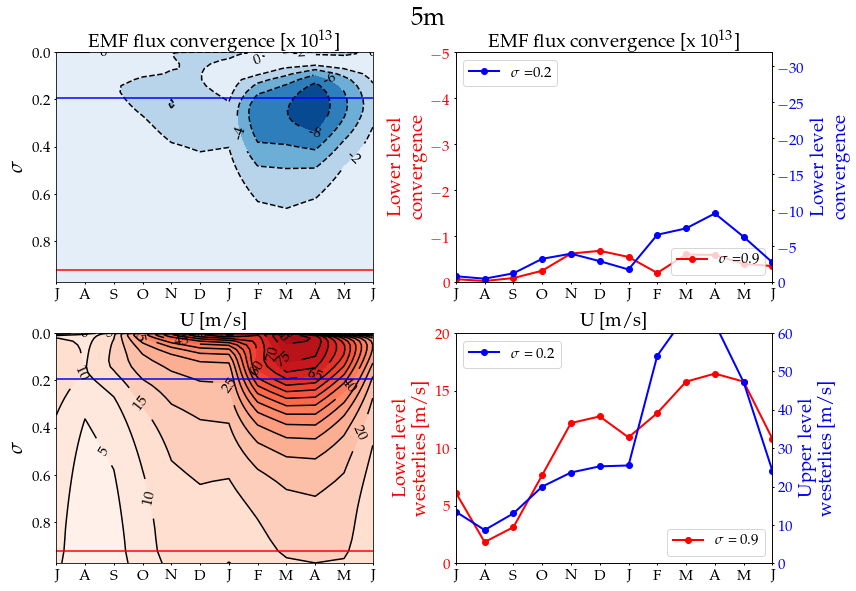

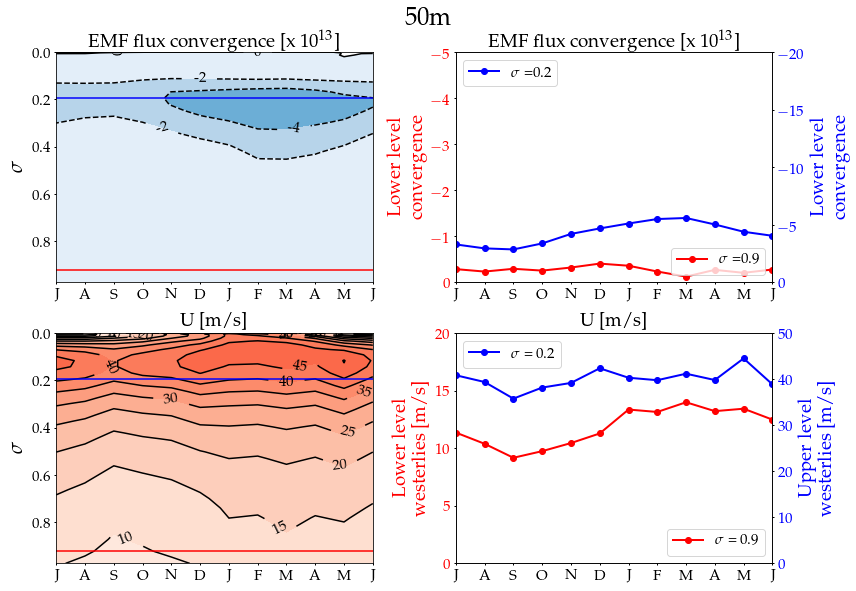

In [66]:
plot_up_low_divEMF_U_at_EMF_shifted(d=0,L2=60)
plot_up_low_divEMF_U_at_EMF_shifted(d=1,L2=50, L1=-20)

## Upper and lower MSE flux and V at max EMF flux convergence (shifted)

In [67]:
def plot_low_up_MSE_V_at_storm(d):
    
    def draw_MM_down(ax,d,si,sf,flag=1, c='g', field = div_EMF*10**13, l1=-31, l2=0, label='surface'):
        ax2 = ax
        ax2.tick_params(axis='y', labelcolor=c,labelsize=12)
    #     ax2.plot(np.roll(range(13),roll), np.roll(flag*inerp_at_emf_conv(field[:,:,si:sf,:].sum(axis=2),lat_a)[d,:],roll), c+'-', lw=2, label=label)
        ax2.plot(np.roll(flag*inerp_at_max(field[:,:,si:sf,:].sum(axis=2),lat_a)[d,:-1],roll), c+'o-', lw=2, label=label)
        ax2.set_ylim(l1,l2)
        py.xlim(0,11)
        py.xticks(range(12),np.roll(mticks2,roll))
        py.tick_params(labelsize=15,size=2,width=1)

    def draw_MM_up(ax,d,si,sf,flag=1, c='g', field = div_EMF*10**13, l1=-31, l2=0, label='surface'):
        ax2 = ax.twinx()
        ax2.tick_params(axis='y', labelcolor=c,labelsize=12)
    #     ax2.plot(np.roll(range(13),roll), np.roll(flag*inerp_at_emf_conv(field[:,:,si:sf,:].sum(axis=2),lat_a)[d,:],roll), c+'-', lw=2, label=label)
        ax2.plot( np.roll(flag*inerp_at_max(field[:,:,si:sf,:].sum(axis=2),lat_a)[d,:-1],roll), c+'o-', lw=2, label=label)
        ax2.set_ylim(l1,l2)
        py.xlim(0,11)
        py.xticks(range(12),np.roll(mticks2,roll))
        py.tick_params(labelsize=15,size=2,width=1)

    def draw_MM_sum(ax,d,s1=0, s2=12, s3=-9,flag=1, c='g', label='surface - upper'):
        ax2 = ax.twinx()
        ax2.tick_params(axis='y', labelcolor=c,labelsize=12)
        mm_up     = flag*inerp_at_max(div_EMF[:,:,s1:s2,:].sum(axis=2),lat_a)
        mm_down   = flag*inerp_at_max(div_EMF[:,:,s2:s3,:].sum(axis=2),lat_a)                        
        ax2.plot(range(13), np.roll((mm_up+mm_down)[d,:-1],roll), c+'.-', lw=2, label=label)
        ax2.set_ylim(-6,6)
        py.xlim(0,11)
        py.xticks(range(12),np.roll(mticks2,roll))
        py.tick_params(labelsize=15,size=2,width=1)
    
    
    low=1; up=24; roll=6
    mticks2 = ['J','F','M','A','M','J','J','A','S','O','N','D']
    py.figure(figsize=(12,3))
    ax1=py.subplot(1,2,1)
    draw_MM_down(ax1,d,si=low,sf=low+1,flag=1, c='r', field=(Cp*T_a+L*Q_a+g*Z_a)/10**6, l1=0.25,l2=0.4, label=r"$\sigma$ = %1.2f "%(sigma_full[low]/1000.0)) # surface
    py.ylabel("Lower level \n MSE [MJ/kg]", fontsize=19, color='r')
    py.legend(loc='lower left', fontsize=15)
    draw_MM_up(ax1,d,si=up,sf=up+1,flag=1, c='b', field=(Cp*T_a+L*Q_a+g*Z_a)/10**6, l1=0.25,l2=0.4, label=r"$\sigma$ =%1.2f "%(sigma_full[up]/1000.0)) # up
    py.ylabel("Upper level \n MSE [MJ/kg]", fontsize=19, color='b')
    py.legend(loc='lower right', fontsize=15)
    py.title("MSE [MJ/kg]", fontsize=19)


    ax1=py.subplot(1,2,2)
    draw_MM_down(ax1,d,si=low,sf=low+1,flag=1, c='r', field=V_a, l1=0,l2=1.5, label=r"$\sigma$ = %1.2f "%(sigma_full[low]/1000.0)) # surface
    py.ylabel("Lower level \n poleward wind [m/s]", fontsize=19, color='r')
    py.legend(loc='upper left', fontsize=15)
    draw_MM_up(ax1,d,si=up,sf=up+1,flag=1, c='b', field=V_a, l1=-1.5,l2=0, label=r"$\sigma$ =%1.2f "%(sigma_full[up]/1000.0)) # up
    py.gca().invert_yaxis()
    py.ylabel("Upper level \n equatorward wind [m/s]", fontsize=19, color='b')
    py.legend(loc='upper right', fontsize=15)
    py.title("V [m/s]", fontsize=19)

    py.tight_layout()


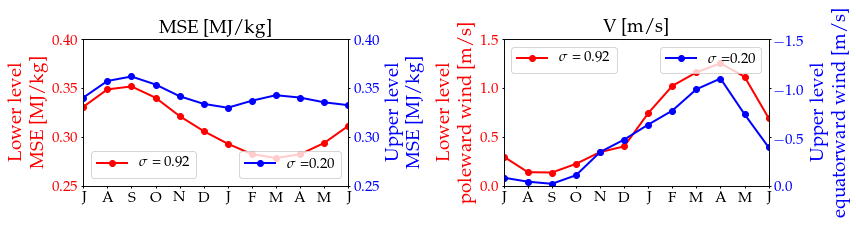

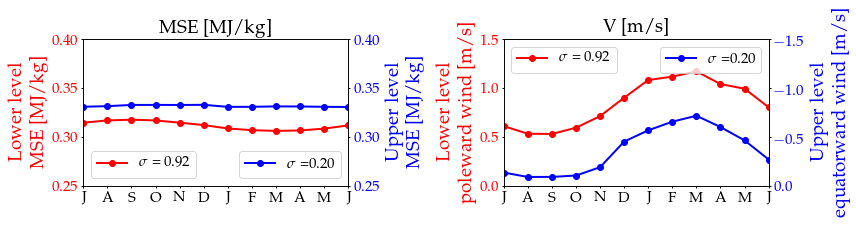

In [68]:
plot_low_up_MSE_V_at_storm(0)
plot_low_up_MSE_V_at_storm(1)

## Upper and lower MSE flux and V at max EMF flux convergence (shifted)

In [69]:
def plot_low_up_MSE_V_at_emf(d):
    
    def draw_MM_down(ax,d,si,sf,flag=1, c='g', field = div_EMF*10**13, l1=-31, l2=0, label='surface'):
        ax2 = ax
        ax2.tick_params(axis='y', labelcolor=c,labelsize=12)
    #     ax2.plot(np.roll(range(13),roll), np.roll(flag*inerp_at_emf_conv(field[:,:,si:sf,:].sum(axis=2),lat_a)[d,:],roll), c+'-', lw=2, label=label)
        ax2.plot(np.roll(flag*inerp_at_emf_conv(field[:,:,si:sf,:].sum(axis=2),lat_a)[d,:-1],roll), c+'o-', lw=2, label=label)
        ax2.set_ylim(l1,l2)
        py.xlim(0,11)
        py.xticks(range(12),np.roll(mticks2,roll))
        py.tick_params(labelsize=15,size=2,width=1)

    def draw_MM_up(ax,d,si,sf,flag=1, c='g', field = div_EMF*10**13, l1=-31, l2=0, label='surface'):
        ax2 = ax.twinx()
        ax2.tick_params(axis='y', labelcolor=c,labelsize=12)
    #     ax2.plot(np.roll(range(13),roll), np.roll(flag*inerp_at_emf_conv(field[:,:,si:sf,:].sum(axis=2),lat_a)[d,:],roll), c+'-', lw=2, label=label)
        ax2.plot( np.roll(flag*inerp_at_emf_conv(field[:,:,si:sf,:].sum(axis=2),lat_a)[d,:-1],roll), c+'o-', lw=2, label=label)
        ax2.set_ylim(l1,l2)
        py.xlim(0,11)
        py.xticks(range(12),np.roll(mticks2,roll))
        py.tick_params(labelsize=15,size=2,width=1)

    def draw_MM_sum(ax,d,s1=0, s2=12, s3=-9,flag=1, c='g', label='surface - upper'):
        ax2 = ax.twinx()
        ax2.tick_params(axis='y', labelcolor=c,labelsize=12)
        mm_up     = flag*inerp_at_emf_conv(div_EMF[:,:,s1:s2,:].sum(axis=2),lat_a)
        mm_down   = flag*inerp_at_emf_conv(div_EMF[:,:,s2:s3,:].sum(axis=2),lat_a)                        
        ax2.plot(range(13), np.roll((mm_up+mm_down)[d,:-1],roll), c+'.-', lw=2, label=label)
        ax2.set_ylim(-6,6)
        py.xlim(0,11)
        py.xticks(range(12),np.roll(mticks2,roll))
        py.tick_params(labelsize=15,size=2,width=1)
    
    
    low=1; up=24; roll=6
    mticks2 = ['J','F','M','A','M','J','J','A','S','O','N','D']
    py.figure(figsize=(12,3))
    ax1=py.subplot(1,2,1)
    draw_MM_down(ax1,d,si=low,sf=low+1,flag=1, c='r', field=(Cp*T_a+L*Q_a+g*Z_a)/10**6, l1=0.25,l2=0.4, label=r"$\sigma$ = %1.2f "%(sigma_full[low]/1000.0)) # surface
    py.ylabel("Lower level \n MSE [MJ/kg]", fontsize=19, color='r')
    py.legend(loc='lower left', fontsize=15)
    draw_MM_up(ax1,d,si=up,sf=up+1,flag=1, c='b', field=(Cp*T_a+L*Q_a+g*Z_a)/10**6, l1=0.25,l2=0.4, label=r"$\sigma$ =%1.2f "%(sigma_full[up]/1000.0)) # up
    py.ylabel("Upper level \n MSE [MJ/kg]", fontsize=19, color='b')
    py.legend(loc='lower right', fontsize=15)
    py.title("MSE [MJ/kg]", fontsize=19)


    ax1=py.subplot(1,2,2)
    draw_MM_down(ax1,d,si=low,sf=low+1,flag=1, c='r', field=V_a, l1=0,l2=1.5, label=r"$\sigma$ = %1.2f "%(sigma_full[low]/1000.0)) # surface
    py.ylabel("Lower level \n poleward wind [m/s]", fontsize=19, color='r')
    py.legend(loc='upper left', fontsize=15)
    draw_MM_up(ax1,d,si=up,sf=up+1,flag=1, c='b', field=V_a, l1=-1.5,l2=0, label=r"$\sigma$ =%1.2f "%(sigma_full[up]/1000.0)) # up
    py.gca().invert_yaxis()
    py.ylabel("Upper level \n equatorward wind [m/s]", fontsize=19, color='b')
    py.legend(loc='upper right', fontsize=15)
    py.title("V [m/s]", fontsize=19)

    py.tight_layout()


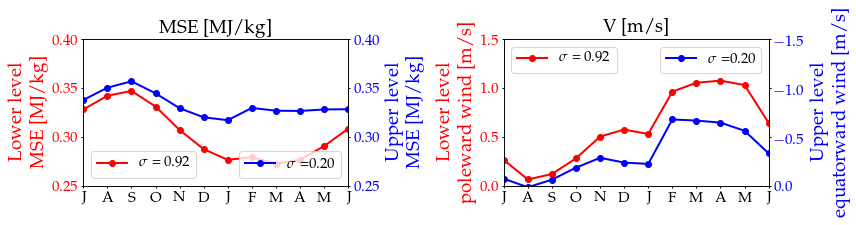

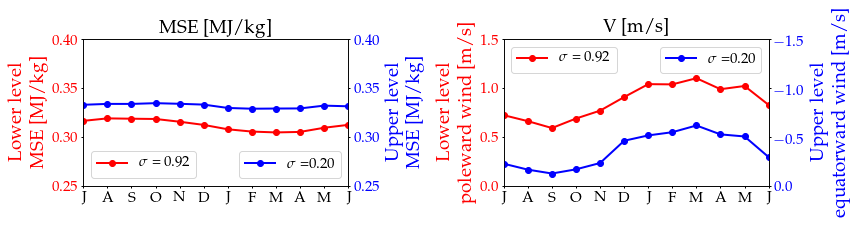

In [70]:
plot_low_up_MSE_V_at_emf(0)
plot_low_up_MSE_V_at_emf(1)

In [71]:
div_T   = np.array([spher_div(T_a[...,lev,:]) for lev in range(0,len(sigma_full))]).transpose(1,2,0,3)

In [72]:
### Plot contour levels 

In [73]:
def plot(lev=0, field = div_EMF, title = "EMF", gap=3, lin=(lat_a>20) & (lat_a<70), ROLL=0):
    if lev==None:
        emf = field
    else:
        emf = field[...,lev,:]
    
    loc=1
    # d=0
    omega=7.29e-5
    sig=sigma_full[loc]/1000
    mticks2 = (np.array(['J','F','M','A','M','J','J','A','S','O','N','D']))
    #mticks2 = (np.array(['J','A','S','O','N','D', 'J','F','M','A','M','J','J']))

    depths=depthss

    def roll(x):
        y=np.roll(x[...],ROLL,axis=-1)
        return y #np.append(y, y[...,0,None],axis=-1)

    py.rc('text', usetex=True)
    py.rc('font', family='serif', serif='Palatino',weight='bold')

    py.figure(figsize=(15,10))

    # loc=loc-1
    d=0
    loc=22
    n=2;

    d=1
    py.subplot(2,2,1)
    # py.contourf(range(13), lat_a, roll(10*fo_baro_a[0,:,:]/(deno)),30,cmap=cm.seismic); #py.colorbar()
    max_range = int(max(  np.abs(np.min(emf[d,lin,:])), np.abs(np.max(emf[d,lin,:]))  )+gap) 
    c=py.contourf(range(12), lat_a[lin], roll(emf[d,lin,:-1]),np.arange(-max_range,max_range+gap,gap),cmap= cm.RdBu_r); py.colorbar()
    #py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=20,fontsize=25)
    py.tick_params(labelsize=22,size=4,width=2)
    py.title(title+', '+str(depths[d]),fontsize=30)
    py.xticks(range(12), roll(mticks2),fontsize=15)
    py.tick_params(labelsize=25,size=4,width=2)
    py.ylabel('latitude',fontsize=27)
    py.plot(roll(storm_pos[d,:-1]), 'rs-', lw=3.0 )
    py.ylim(int(lat_a[lin][0]),int(lat_a[lin][-1]))
    py.tight_layout()

    d=0
    py.subplot(2,2,2)
    # py.contourf(range(13), lat_a, roll(10*fo_baro_a[0,:,:]/(deno)),30,cmap=cm.seismic); #py.colorbar()
    max_range = int(max(np.abs(np.min(emf[d,lin,:])), np.abs(np.max(emf[d,lin,:])))+gap)
    c=py.contourf(range(12), lat_a[lin], roll(emf[d,lin,:-1]),np.arange(-max_range,max_range+gap,gap),cmap= cm.RdBu_r); py.colorbar()
    #py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=20,fontsize=25)
    py.tick_params(labelsize=22,size=4,width=2)
    py.title(title+', '+str(depths[d]),fontsize=30)
    py.xticks(range(12), roll(mticks2),fontsize=15)
    py.tick_params(labelsize=25,size=4,width=2)
    py.ylabel('latitude',fontsize=27)
    py.plot(roll(storm_pos[d,:-1]), 'rs-', lw=3.0 )
    py.ylim(int(lat_a[lin][0]),int(lat_a[lin][-1]))
    py.tight_layout()

In [143]:
def plot0(lev=0, field = div_EMF, title = "EMF", gap=3, lin=(lat_a>20) & (lat_a<70), ROLL=0, ranges=np.arange(-1.0,1.2,0.2)):
    if lev==None:
        emf = field
    else:
        emf = field[...,lev,:]
    
    loc=1
    # d=0
    omega=7.29e-5
    sig=sigma_full[loc]/1000
    mticks2 = (np.array(['J','F','M','A','M','J','J','A','S','O','N','D']))
    #mticks2 = (np.array(['J','A','S','O','N','D', 'J','F','M','A','M','J','J']))

    depths=depthss

    def roll(x):
        y=np.roll(x[...],ROLL,axis=-1)
        return y #np.append(y, y[...,0,None],axis=-1)

    py.rc('text', usetex=True)
    py.rc('font', family='serif', serif='Palatino',weight='bold')

    py.figure(figsize=(15,10))

    # loc=loc-1
    d=0
    loc=22
    n=2;

    d=1
    py.subplot(2,2,1)
    # py.contourf(range(13), lat_a, roll(10*fo_baro_a[0,:,:]/(deno)),30,cmap=cm.seismic); #py.colorbar()
    max_range = (max(  np.abs(np.min(emf[d,lin,:])), np.abs(np.max(emf[d,lin,:]))  )+gap) 
    c=py.contourf(range(12), lat_a[lin], roll(emf[d,lin,:-1]), ranges, cmap= cm.RdBu_r); #py.colorbar() #np.arange(-max_range,max_range+gap,gap),
    c=py.contour(range(12), lat_a[lin], roll(emf[d,lin,:-1]), ranges, colors='k'); #py.colorbar() #np.arange(-max_range,max_range+gap,gap),
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=10,fontsize=15)
    py.tick_params(labelsize=22,size=4,width=2)
    py.title(title+', '+str(depths[d]),fontsize=30)
    py.xticks(range(12), roll(mticks2),fontsize=15)
    py.tick_params(labelsize=25,size=4,width=2)
    py.ylabel('latitude',fontsize=27)
    py.plot(roll(storm_pos[d,:-1]), 'rs-', lw=3.0 )
    py.ylim(int(lat_a[lin][0]),int(lat_a[lin][-1]))
    py.tight_layout()

    d=0
    py.subplot(2,2,2)
    # py.contourf(range(13), lat_a, roll(10*fo_baro_a[0,:,:]/(deno)),30,cmap=cm.seismic); #py.colorbar()
    max_range = (max(np.abs(np.min(emf[d,lin,:])), np.abs(np.max(emf[d,lin,:])))+gap)
    c=py.contourf(range(12), lat_a[lin], roll(emf[d,lin,:-1]), ranges, cmap= cm.RdBu_r); #py.colorbar() #np.arange(-max_range,max_range+gap,gap),c
    c=py.contour(range(12), lat_a[lin], roll(emf[d,lin,:-1]), ranges, colors='k'); #py.colorbar() #np.arange(-max_range,max_range+gap,gap),
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=10,fontsize=15)
    py.tick_params(labelsize=22,size=4,width=2)
    py.title(title+', '+str(depths[d]),fontsize=30)
    py.xticks(range(12), roll(mticks2),fontsize=15)
    py.tick_params(labelsize=25,size=4,width=2)
    py.ylabel('latitude',fontsize=27)
    py.plot(roll(storm_pos[d,:-1]), 'rs-', lw=3.0 )
    py.ylim(int(lat_a[lin][0]),int(lat_a[lin][-1]))
    py.tight_layout()

In [127]:
f = 2*omega*np.sin(np.deg2rad(lat_a[None,:,None,None]))

In [140]:
v_eddy = div_EMF/f

In [139]:
v_eddy2 = div_EMF/(f+rel_vort)

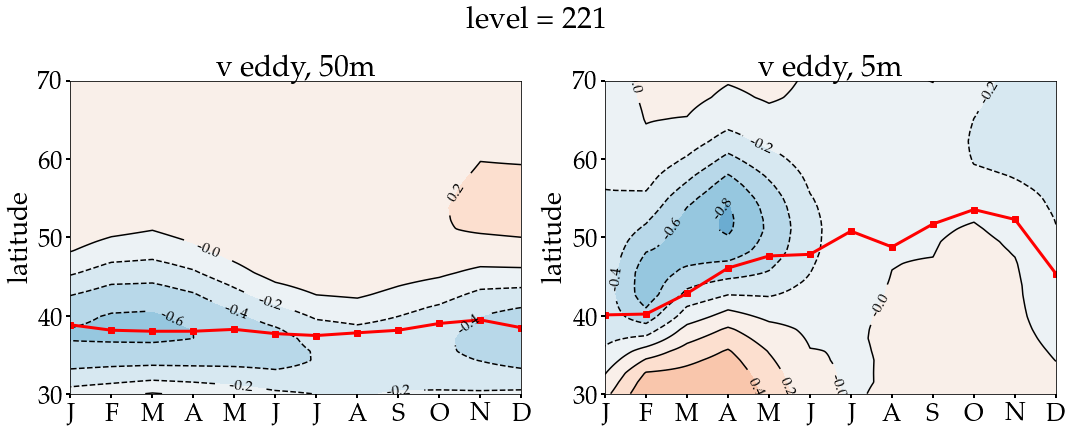

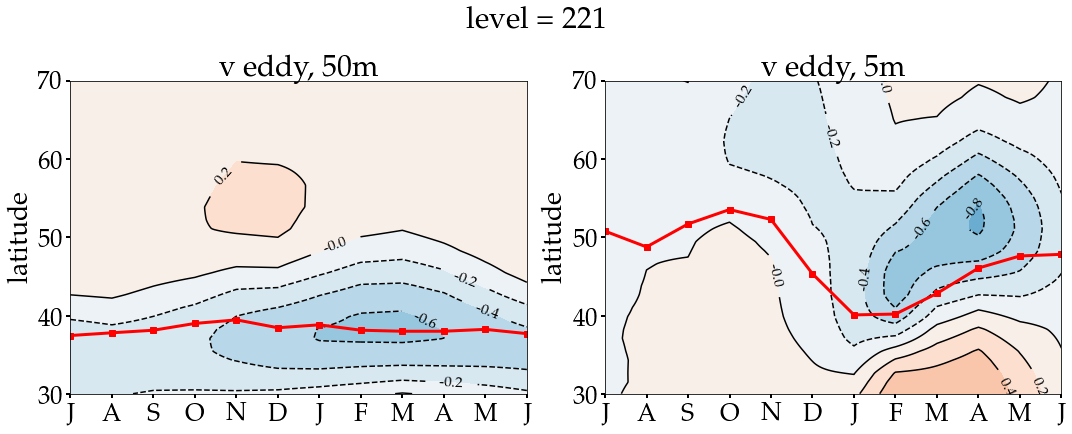

In [147]:
l=23
plot0(lev=l, field = v_eddy, title = "v eddy", gap=0.1, ROLL=0,lin=(lat_a>30) & (lat_a<71), ranges= np.arange(-1.8,2.0,0.2) )
py.suptitle("level = %1d"%(sigma_full[l]), fontsize=30, y=1.05)

l=23
plot0(lev=l, field = v_eddy, title = "v eddy", gap=0.1, ROLL=6, lin=(lat_a>30) & (lat_a<71), ranges= np.arange(-1.8,2.0,0.2))
py.suptitle("level = %1d"%(sigma_full[l]), fontsize=30, y=1.05)

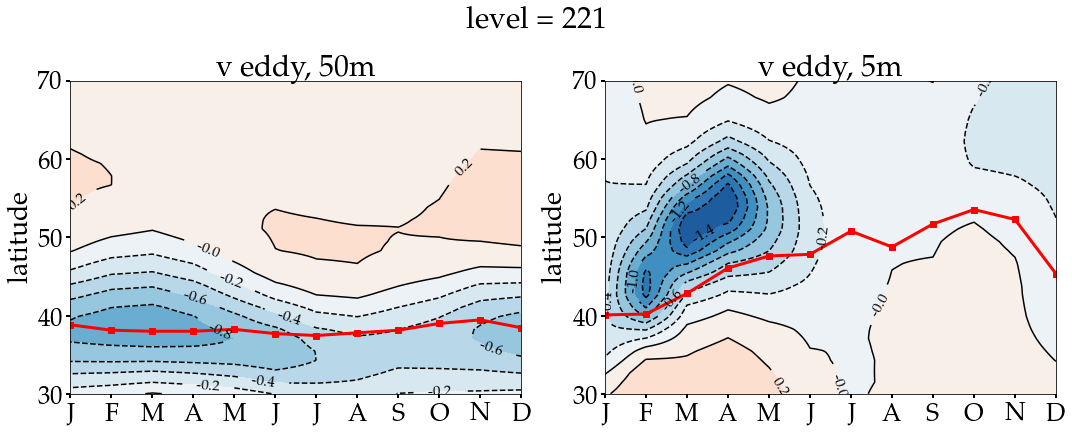

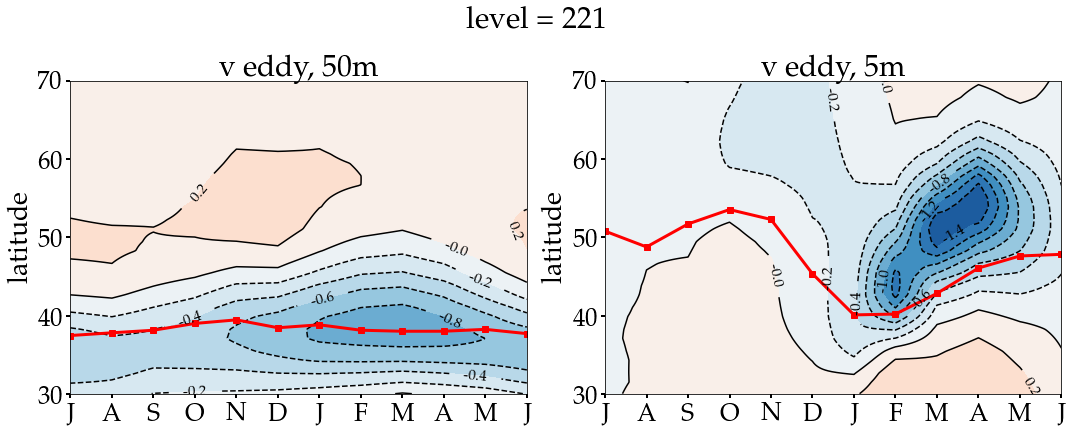

In [146]:
l=23
plot0(lev=l, field = v_eddy2, title = "v eddy", gap=0.1, ROLL=0,lin=(lat_a>30) & (lat_a<71), ranges= np.arange(-1.8,2.0,0.2) )
py.suptitle("level = %1d"%(sigma_full[l]), fontsize=30, y=1.05)

l=23
plot0(lev=l, field = v_eddy2, title = "v eddy", gap=0.1, ROLL=6, lin=(lat_a>30) & (lat_a<71), ranges= np.arange(-1.8,2.0,0.2))
py.suptitle("level = %1d"%(sigma_full[l]), fontsize=30, y=1.05)

In [ ]:
l=22
plot(lev=l, field = div_EMF*10**5, title = "EMF convergence", gap=1.0, ROLL=0,lin=(lat_a>30) & (lat_a<71) )
py.suptitle("level = %1d"%(sigma_full[l]), fontsize=30, y=1.05)

l=22
plot(lev=l, field = div_EMF*10**5, title = "EMF convergence", gap=1.0, ROLL=6, lin=(lat_a>30) & (lat_a<71))
py.suptitle("level = %1d"%(sigma_full[l]), fontsize=30, y=1.05)

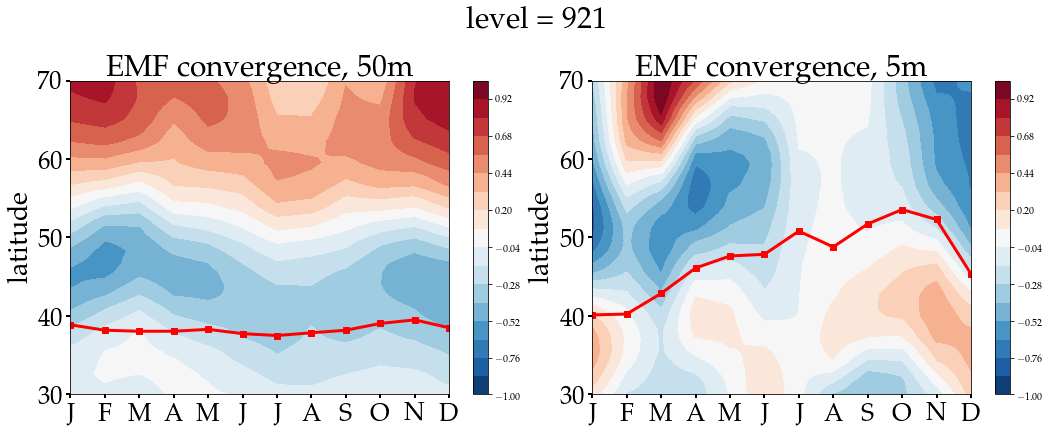

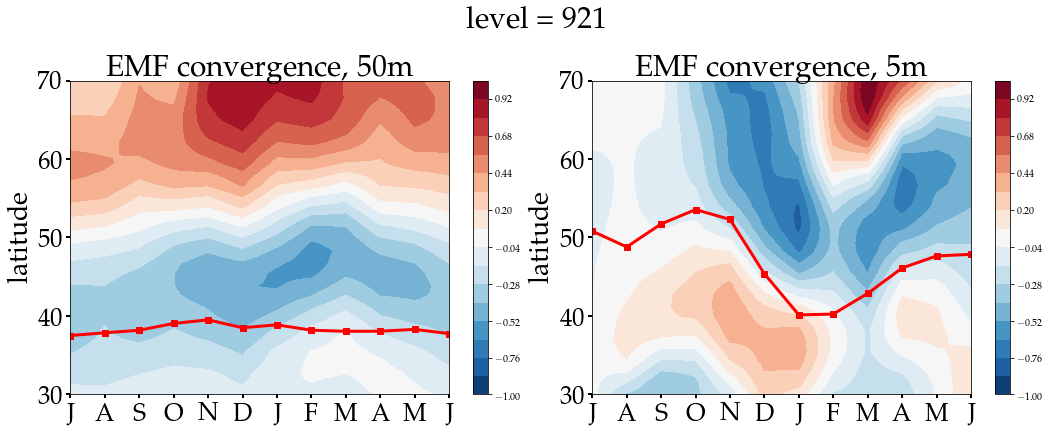

In [74]:
l=1
plot(lev=l, field = div_EMF*10**5, title = "EMF convergence", gap=0.12, ROLL=0,lin=(lat_a>30) & (lat_a<71))
py.suptitle("level = %1d"%(sigma_full[l]), fontsize=30, y=1.05)

l=1
plot(lev=l, field = div_EMF*10**5, title = "EMF convergence", gap=0.12, ROLL=6,lin=(lat_a>30) & (lat_a<71))
py.suptitle("level = %1d"%(sigma_full[l]), fontsize=30, y=1.05)

In [75]:
print 1

1


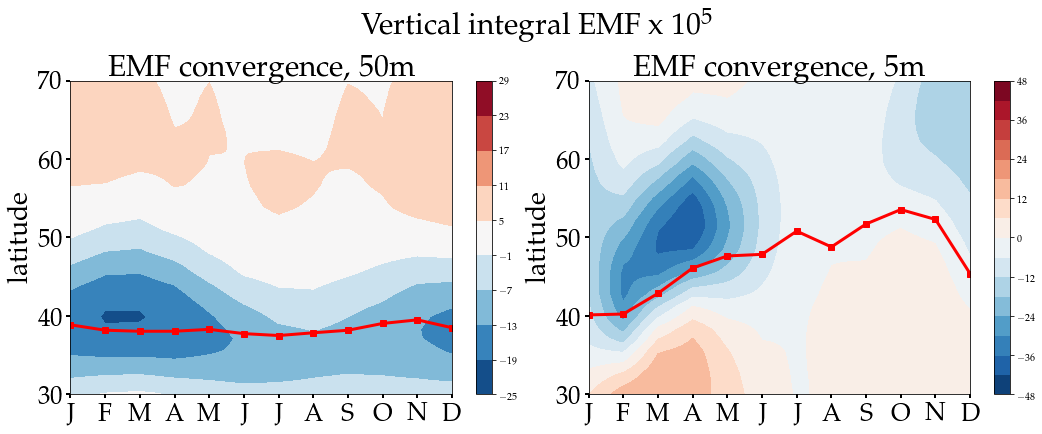

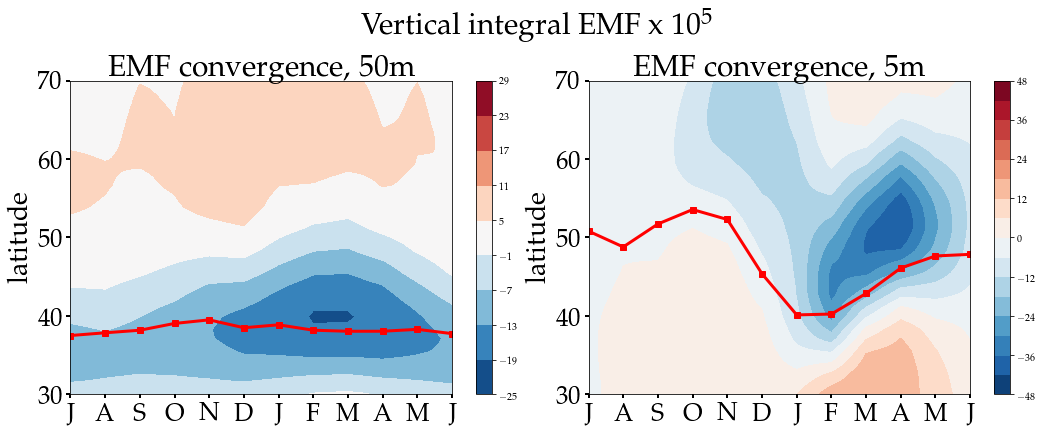

In [76]:
def spher_div2(x,lat=lat_a):
       N=100
       fac= np.cos(np.radians(lat))**2
       div=np.copy(x)
       for d in range(len(DEPTHS)):
        for m in range(13):
           div[d,:,m]= smooth( np.gradient((x[d,:,m])*(fac),dtheta)/( R* ( np.cos(np.radians(lat_a[:])) )**2 ) ,N)
       return div

div_EMF_nv = spher_div2(EMF_a)

l=0
plot(lev=None, field = (div_EMF_nv)*10**2, title = "EMF convergence", gap=6, ROLL=0,lin=(lat_a>30) & (lat_a<71))
py.suptitle(r"Vertical integral EMF x $10^{5}$", fontsize=30, y=1.05)
py.show()

l=0
plot(lev=None, field = (div_EMF_nv)*10**2, title = "EMF convergence", gap=6, ROLL=6,lin=(lat_a>30) & (lat_a<71))
py.suptitle(r"Vertical integral EMF x $10^{5}$", fontsize=30, y=1.05)
py.show()

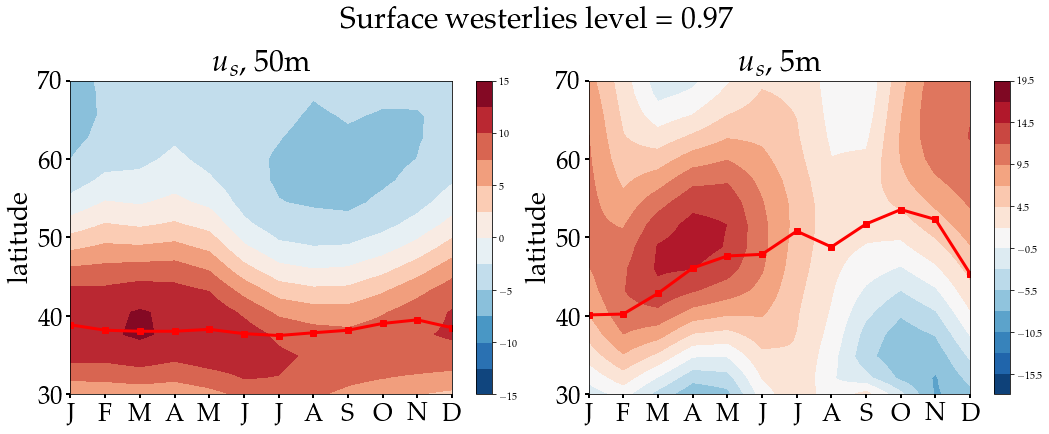

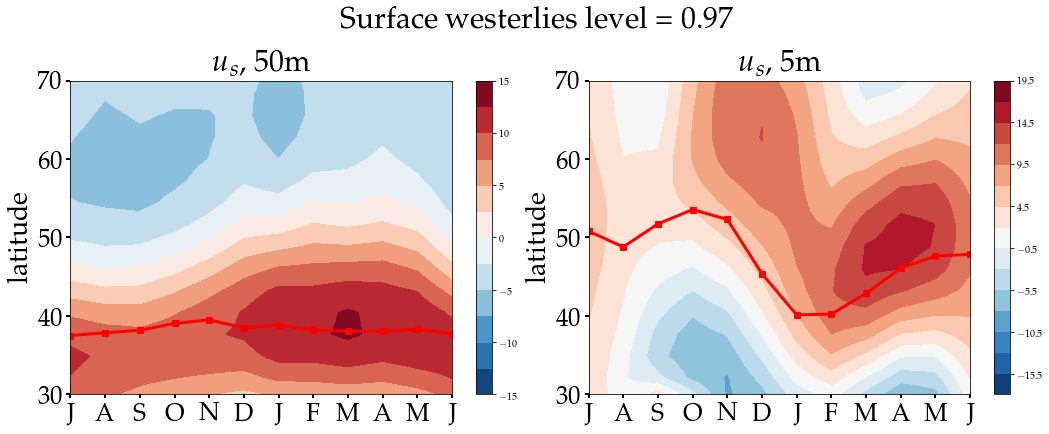

In [77]:
l=0
plot(lev=l, field = U_a, title = "$u_{s}$", gap=2.5, ROLL=0,lin=(lat_a>30) & (lat_a<71))
py.suptitle("Surface westerlies level = %1.2f"%(sigma_full[l]/1000.0), fontsize=30, y=1.05)
py.show()

l=0
plot(lev=l, field = U_a, title = "$u_{s}$", gap=2.5, ROLL=6,lin=(lat_a>30) & (lat_a<71))
py.suptitle("Surface westerlies level = %1.2f"%(sigma_full[l]/1000.0), fontsize=30, y=1.05)
py.show()

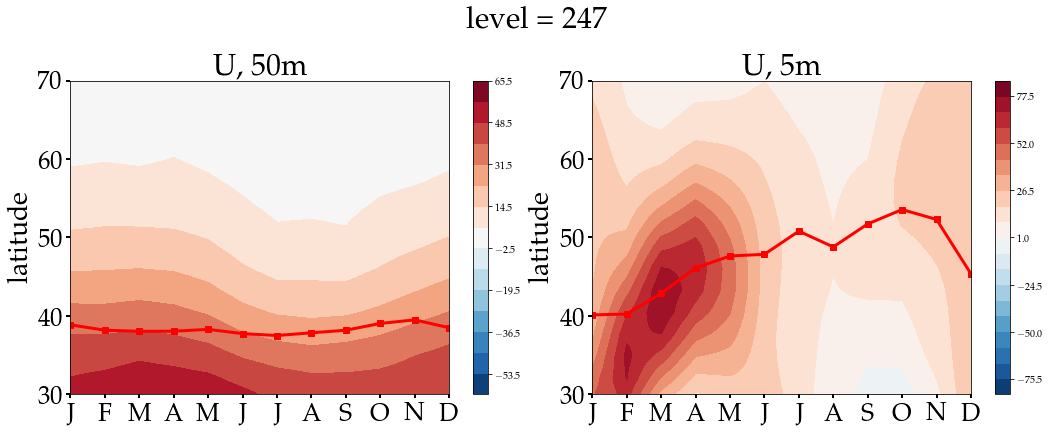

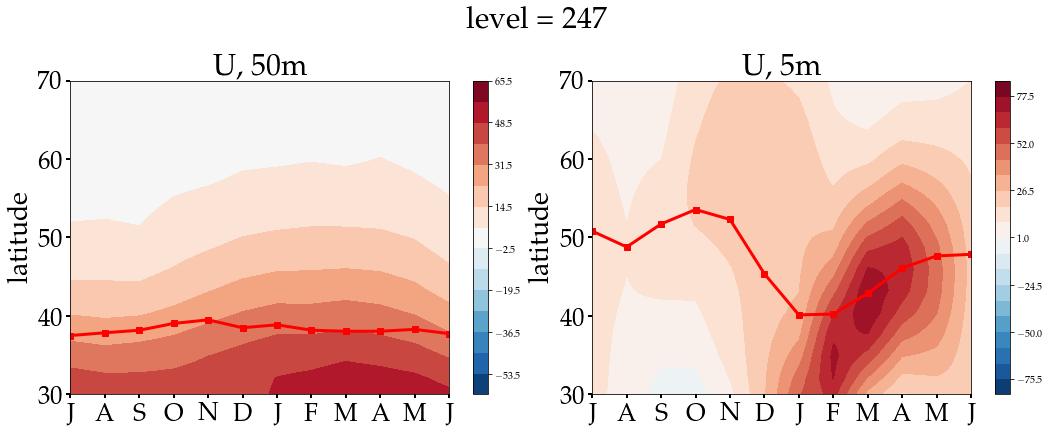

In [78]:
l=22
plot(lev=l, field = U_a, title = "U", gap=8.5, ROLL=0,lin=(lat_a>30) & (lat_a<71))
py.suptitle("level = %1d"%(sigma_full[l]), fontsize=30, y=1.05)
py.show()

l=22
plot(lev=l, field = U_a, title = "U", gap=8.5, ROLL=6,lin=(lat_a>30) & (lat_a<71))
py.suptitle("level = %1d"%(sigma_full[l]), fontsize=30, y=1.05)
py.show()

In [79]:
def plot2(lev=0, field = div_EMF, title = "EMF", gap=3, lin=(lat_a>20) & (lat_a<70), ROLL=0):
    if lev==None:
        emf = field
    else:
        emf = field[...,lev,:]
    
    loc=1
    # d=0
    omega=7.29e-5
    sig=sigma_full[loc]/1000
    mticks2 = (np.array(['J','F','M','A','M','J','J','A','S','O','N','D','J']))
    #mticks2 = (np.array(['J','A','S','O','N','D', 'J','F','M','A','M','J','J']))

    depths=depthss

    def roll(x):
        y=np.roll(x[...],ROLL,axis=-1)
        return y #np.append(y, y[...,0,None],axis=-1)

    py.rc('text', usetex=True)
    py.rc('font', family='serif', serif='Palatino',weight='bold')

    py.figure(figsize=(15,10))

    # loc=loc-1
    d=0
    loc=22
    n=2;

    d=1
    py.subplot(2,2,1)
    # py.contourf(range(13), lat_a, roll(10*fo_baro_a[0,:,:]/(deno)),30,cmap=cm.seismic); #py.colorbar()
    max_range = (max(  np.abs(np.min(emf[d,lin,:])), np.abs(np.max(emf[d,lin,:]))  )+gap) 
    c=py.contourf(range(12), lat_a[lin], roll(emf[d,lin,:-1]),np.arange(-max_range,max_range+gap,gap),cmap= cm.RdBu_r); py.colorbar()
    #py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=20,fontsize=25)
    py.tick_params(labelsize=22,size=4,width=2)
    py.title(title+', '+str(depths[d]),fontsize=30)
    py.xticks(range(12), roll(mticks2),fontsize=15)
    py.tick_params(labelsize=25,size=4,width=2)
    py.ylabel('latitude',fontsize=27)
    py.plot(roll(storm_pos[d,:-1]), 'rs-', lw=3.0 )
    py.ylim(int(lat_a[lin][0]),int(lat_a[lin][-1]))
    py.tight_layout()

    d=0
    py.subplot(2,2,2)
    # py.contourf(range(13), lat_a, roll(10*fo_baro_a[0,:,:]/(deno)),30,cmap=cm.seismic); #py.colorbar()
    max_range = (max(np.abs(np.min(emf[d,lin,:])), np.abs(np.max(emf[d,lin,:])))+gap)
    c=py.contourf(range(12), lat_a[lin], roll(emf[d,lin,:-1]),np.arange(-max_range,max_range+gap,gap),cmap= cm.RdBu_r); py.colorbar()
    #py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=20,fontsize=25)
    py.tick_params(labelsize=22,size=4,width=2)
    py.title(title+', '+str(depths[d]),fontsize=30)
    py.xticks(range(12), roll(mticks2),fontsize=15)
    py.tick_params(labelsize=25,size=4,width=2)
    py.ylabel('latitude',fontsize=27)
    py.plot(roll(storm_pos[d,:-1]), 'rs-', lw=3.0 )
    py.ylim(int(lat_a[lin][0]),int(lat_a[lin][-1]))
    py.tight_layout()
    
    l=23

py.suptitle("level = %1d"%(sigma_full[l]), fontsize=30, y=1.05)

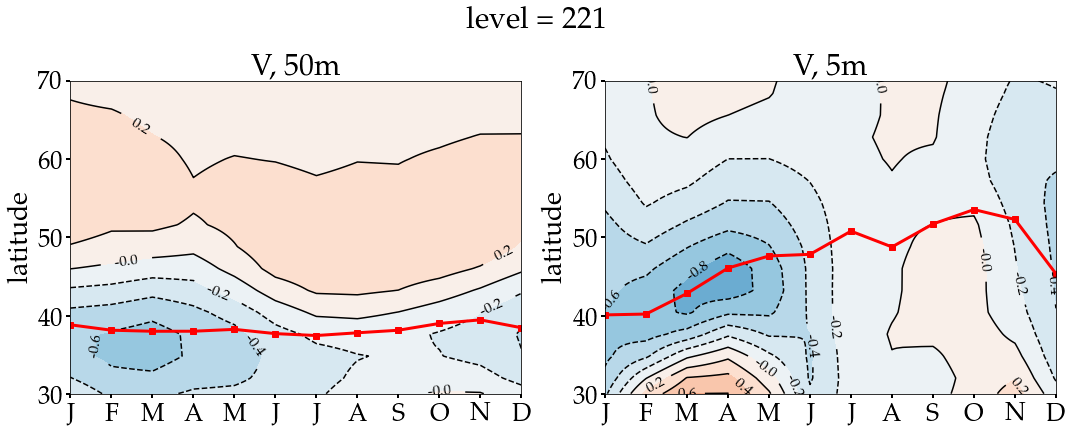

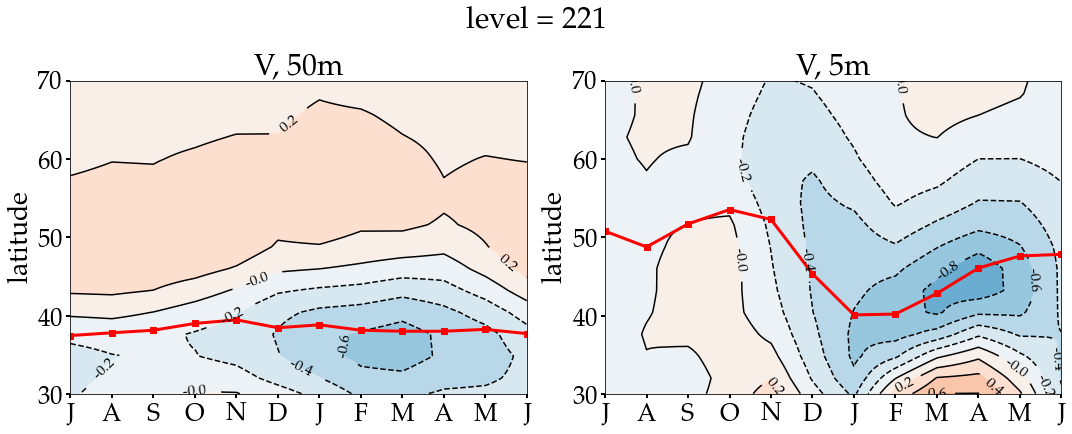

In [148]:
l=23
plot0(lev=l, field = V_a, title = "V", gap=0.1, ROLL=0, lin=(lat_a>30) & (lat_a<71), ranges= np.arange(-1.8,2.0,0.2))
py.suptitle("level = %1d"%(sigma_full[l]), fontsize=30, y=1.05)
py.show()


l=23
plot0(lev=l, field = V_a, title = "V", gap=0.1, ROLL=6, lin=(lat_a>30) & (lat_a<71), ranges= np.arange(-1.8,2.0,0.2))
py.suptitle("level = %1d"%(sigma_full[l]), fontsize=30, y=1.05)
py.show()


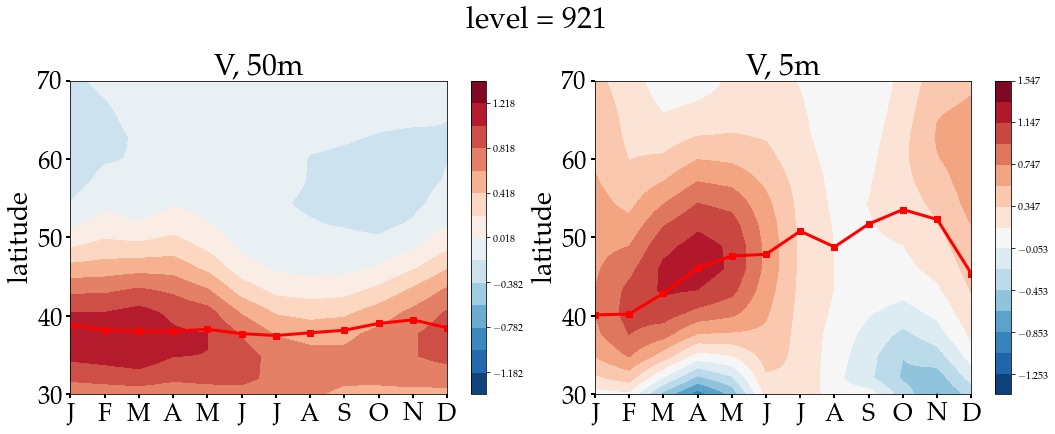

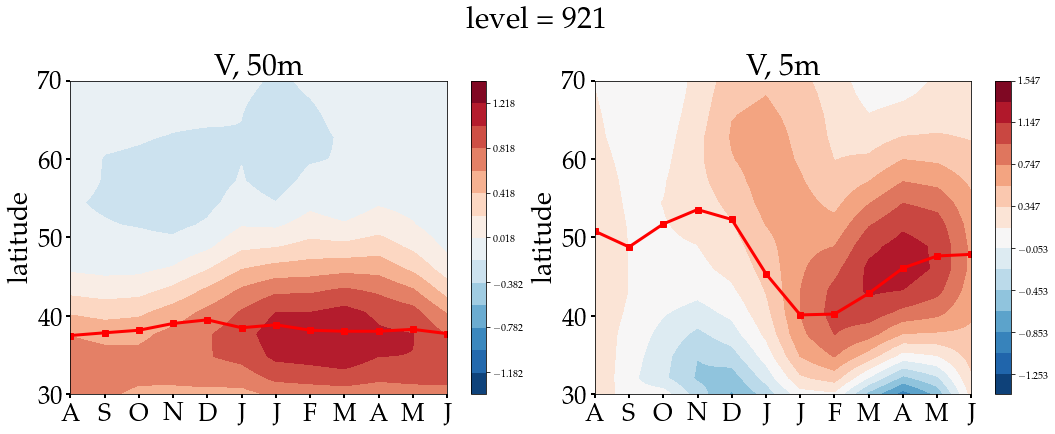

In [81]:
l=1
plot2(lev=l, field = V_a, title = "V", gap=0.2, ROLL=0, lin=(lat_a>30) & (lat_a<71))
py.suptitle("level = %1d"%(sigma_full[l]), fontsize=30, y=1.05)
py.show()

l=1
plot2(lev=l, field = V_a, title = "V", gap=0.2, ROLL=6, lin=(lat_a>30) & (lat_a<71))
py.suptitle("level = %1d"%(sigma_full[l]), fontsize=30, y=1.05)
py.show()

In [82]:
def plot3(lev=0, field = div_EMF, title = "EMF", gap1=3, gap2=3, lin=(lat_a>20) & (lat_a<70), ROLL=0, cont=0):
    if lev==None:
        emf = field
    else:
        emf = field[...,lev,:]
    
    loc=1
    # d=0
    omega=7.29e-5
    sig=sigma_full[loc]/1000
    mticks2 = (np.array(['J','F','M','A','M','J','J','A','S','O','N','D']))
    #mticks2 = (np.array(['J','A','S','O','N','D', 'J','F','M','A','M','J','J']))

    depths=depthss

    def roll(x):
        y=np.roll(x[...],ROLL,axis=-1)
        return y #np.append(y, y[...,0,None],axis=-1)

    py.rc('text', usetex=True)
    py.rc('font', family='serif', serif='Palatino',weight='bold')
    
    if cont==0:
        py.figure(figsize=(15,10))

    # loc=loc-1
    d=0
    loc=22
    n=2;

    d=1
    py.subplot(2,2,1)
    max_range = (max(  np.abs(np.min(emf[d,lin,:])), np.abs(np.max(emf[d,lin,:]))  )+gap1)
    
    if cont==0:
        c=py.contourf(range(12), lat_a[lin], roll(emf[d,lin,:-1]),np.arange(-max_range,max_range+gap1,gap1),cmap= cm.RdBu_r); py.colorbar()
    #py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=20,fontsize=25)
    else :
       c=py.contour(range(12), lat_a[lin], roll(emf[d,lin,:-1]),np.arange(-max_range,max_range+gap1,gap1),colors='k'); 
       py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=10,fontsize=15)
    py.tick_params(labelsize=22,size=4,width=2)
    py.title(title+', '+str(depths[d]),fontsize=30)
    py.xticks(range(12), roll(mticks2),fontsize=15)
    py.tick_params(labelsize=25,size=4,width=2)
    py.ylabel('latitude',fontsize=27)
    py.plot(roll(storm_pos[d,:-1]), 'rs-', lw=3.0 )
    py.ylim(int(lat_a[lin][0]),int(lat_a[lin][-1]))
    py.tight_layout()

    d=0
    py.subplot(2,2,2)
    max_range = (max(np.abs(np.min(emf[d,lin,:])), np.abs(np.max(emf[d,lin,:])))+gap2)
    if cont==0:
        c=py.contourf(range(12), lat_a[lin], roll(emf[d,lin,:-1]),np.arange(-max_range,max_range+gap2,gap2),cmap= cm.RdBu_r); py.colorbar()
    #py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=20,fontsize=25)
    else:
       c=py.contour(range(12), lat_a[lin], roll(emf[d,lin,:-1]),np.arange(-max_range,max_range+gap1,gap1),colors='k'); 
       py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=10,fontsize=15)
    py.tick_params(labelsize=22,size=4,width=2)
    py.title(title+', '+str(depths[d]),fontsize=30)
    py.xticks(range(12), roll(mticks2),fontsize=15)
    py.tick_params(labelsize=25,size=4,width=2)
    py.ylabel('latitude',fontsize=27)
    py.plot(roll(storm_pos[d,:-1]), 'rs-', lw=3.0 )
    py.ylim(int(lat_a[lin][0]),int(lat_a[lin][-1]))
    py.tight_layout()

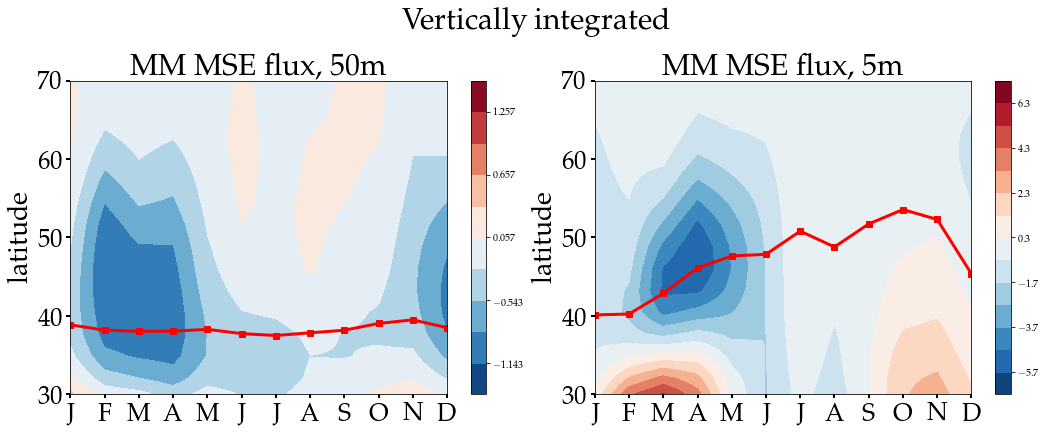

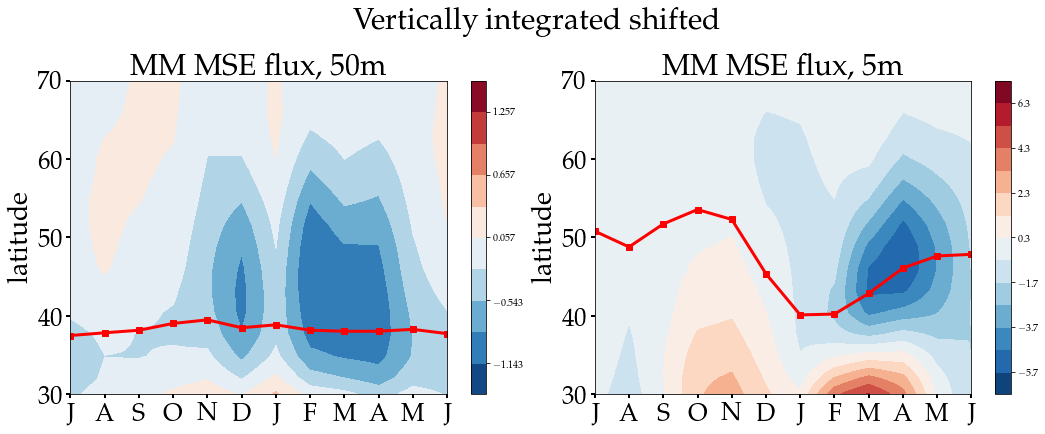

In [83]:
l=23
plot3(lev=None, field = MM_a, title = "MM MSE flux", gap1=0.3, gap2=1, ROLL=0, lin=(lat_a>30) & (lat_a<71))
py.suptitle("Vertically integrated", fontsize=30, y=1.05)
py.show()

l=23
plot3(lev=None, field = MM_a, title = "MM MSE flux", gap1=0.3, gap2=1, ROLL=6, lin=(lat_a>30) & (lat_a<71))
py.suptitle("Vertically integrated shifted ", fontsize=30, y=1.05)
py.show()

In [84]:
def plot4(lev=0, field = div_EMF, title = "EMF", gap1=3, gap2=3, lin=(lat_a>20) & (lat_a<70), ROLL=0, cont=0):
    if lev==None:
        emf = field
    else:
        emf = field[...,lev,:]
    
    loc=1
    # d=0
    omega=7.29e-5
    sig=sigma_full[loc]/1000
    mticks2 = (np.array(['J','F','M','A','M','J','J','A','S','O','N','D']))
    #mticks2 = (np.array(['J','A','S','O','N','D', 'J','F','M','A','M','J','J']))

    depths=depthss

    def roll(x):
        y=np.roll(x[...],ROLL,axis=-1)
        return y #np.append(y, y[...,0,None],axis=-1)

    py.rc('text', usetex=True)
    py.rc('font', family='serif', serif='Palatino',weight='bold')
    
    if cont==0:
        py.figure(figsize=(15,10))

    # loc=loc-1
    d=0
    loc=22
    n=2;

    d=1
    py.subplot(2,2,1)
    max_range = (max(  np.abs(np.min(emf[d,lin,:])), np.abs(np.max(emf[d,lin,:]))  )+gap1)
    
    if cont==0:
        c=py.contourf(range(12), lat_a[lin], roll(emf[d,lin,:-1]),np.arange(0,max_range+gap1,gap1),cmap= cm.Reds); py.colorbar()
    #py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=20,fontsize=25)
    else :
       c=py.contour(range(12), lat_a[lin], roll(emf[d,lin,:-1]),np.arange(0,max_range+gap1,gap1),colors='k'); 
       py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=10,fontsize=15)
    py.tick_params(labelsize=22,size=4,width=2)
    py.title(title+', '+str(depths[d]),fontsize=30)
    py.xticks(range(12), roll(mticks2),fontsize=15)
    py.tick_params(labelsize=25,size=4,width=2)
    py.ylabel('latitude',fontsize=27)
    py.plot(roll(storm_pos[d,:-1]), 'rs-', lw=3.0 )
    py.ylim(int(lat_a[lin][0]),int(lat_a[lin][-1]))
    py.tight_layout()

    d=0
    py.subplot(2,2,2)
    max_range = (max(np.abs(np.min(emf[d,lin,:])), np.abs(np.max(emf[d,lin,:])))+gap2)
    if cont==0:
        c=py.contourf(range(12), lat_a[lin], roll(emf[d,lin,:-1]),np.arange(0,max_range+gap2,gap2),cmap= cm.Reds); py.colorbar()
    #py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=20,fontsize=25)
    else:
       c=py.contour(range(12), lat_a[lin], roll(emf[d,lin,:-1]),np.arange(0,max_range+gap2,gap2),colors='k'); 
       py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=10,fontsize=15)
    py.tick_params(labelsize=22,size=4,width=2)
    py.title(title+', '+str(depths[d]),fontsize=30)
    py.xticks(range(12), roll(mticks2),fontsize=15)
    py.tick_params(labelsize=25,size=4,width=2)
    py.ylabel('latitude',fontsize=27)
    py.plot(roll(storm_pos[d,:-1]), 'rs-', lw=3.0 )
    py.ylim(int(lat_a[lin][0]),int(lat_a[lin][-1]))
    py.tight_layout()

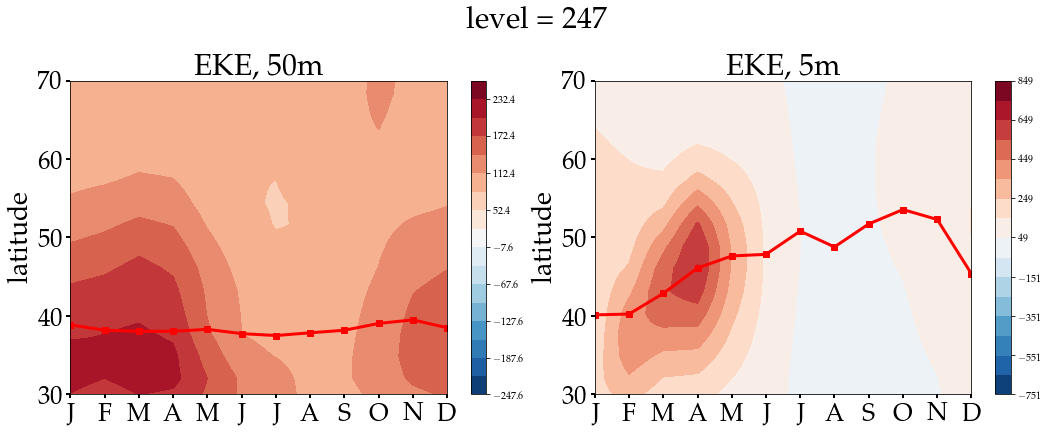

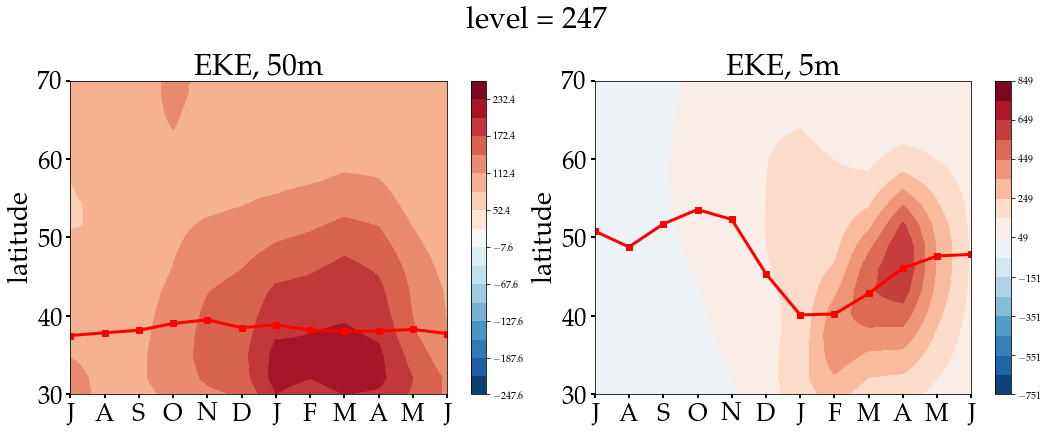

In [85]:
l=22
plot3(lev=l, field = EKEv_a, title = "EKE", gap1= 30, gap2=100, ROLL=0,lin=(lat_a>30) & (lat_a<71) )
py.suptitle("level = %1d"%(sigma_full[l]), fontsize=30, y=1.05)

l=22
plot3(lev=l, field = EKEv_a, title = "EKE", gap1= 30, gap2=100, ROLL=6, lin=(lat_a>30) & (lat_a<71))
py.suptitle("level = %1d"%(sigma_full[l]), fontsize=30, y=1.05)

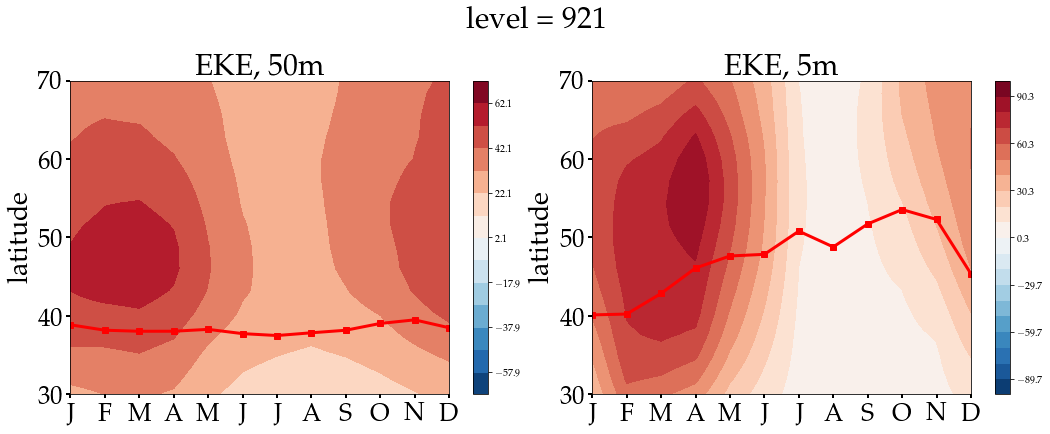

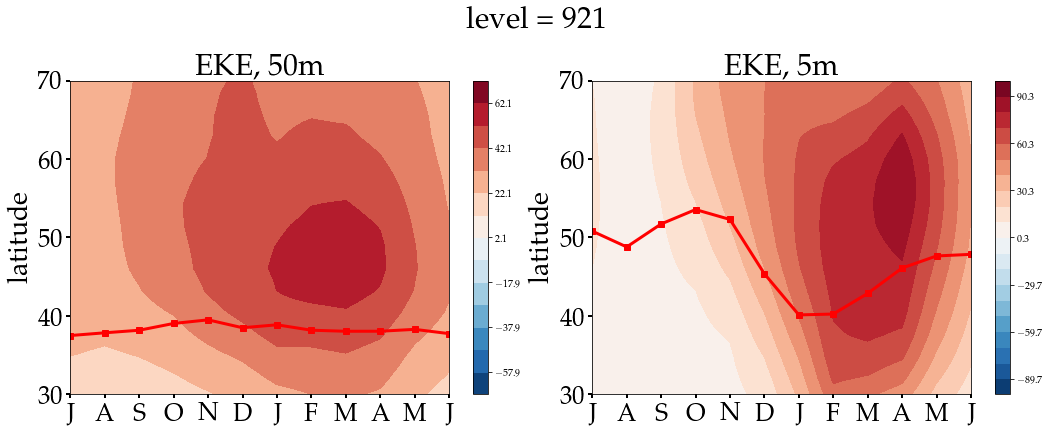

In [86]:
l=1
plot3(lev=l, field = EKEv_a, title = "EKE", gap1= 10, gap2=10, ROLL=0,lin=(lat_a>30) & (lat_a<71) )
py.suptitle("level = %1d"%(sigma_full[l]), fontsize=30, y=1.05)

l=1
plot3(lev=l, field = EKEv_a, title = "EKE", gap1= 10, gap2=10, ROLL=6, lin=(lat_a>30) & (lat_a<71) )
py.suptitle("level = %1d"%(sigma_full[l]), fontsize=30, y=1.05)

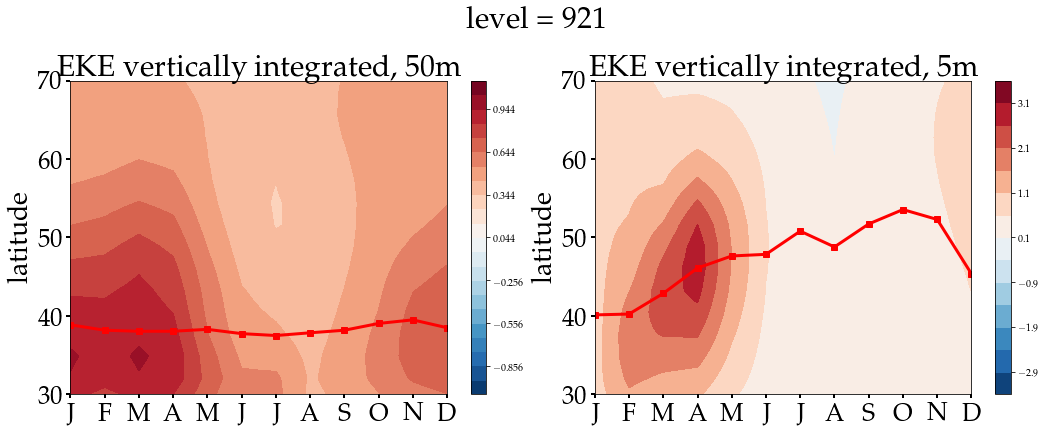

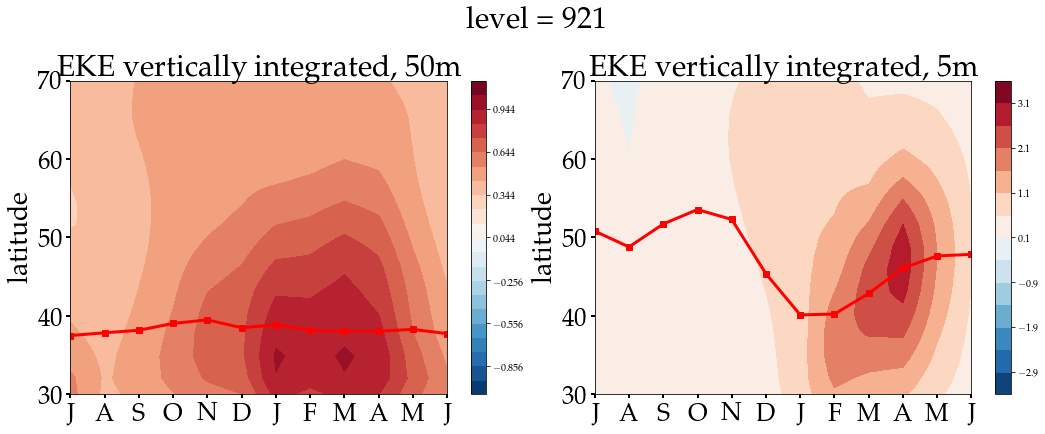

In [87]:
l=1
plot3(lev=None, field = EKE_a/10**6, title = "EKE vertically integrated", gap1= 0.1, gap2=0.5, ROLL=0,lin=(lat_a>30) & (lat_a<71) )
py.suptitle("level = %1d"%(sigma_full[l]), fontsize=30, y=1.05)

l=1
plot3(lev=None, field = EKE_a/10**6, title = "EKE vertically integrated", gap1= 0.1, gap2=0.5, ROLL=6, lin=(lat_a>30) & (lat_a<71))
py.suptitle("level = %1d"%(sigma_full[l]), fontsize=30, y=1.05)

In [88]:
sigma_full[5]
stream.shape

(2, 871, 39, 13)

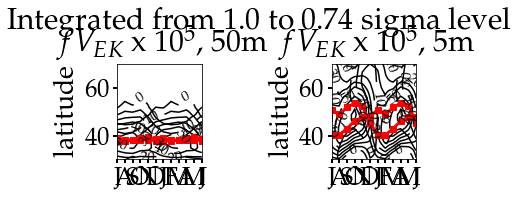

In [89]:
omega = 7.29*10**-5
f = 2*omega*np.sin(np.deg2rad(lat_a[None,:,None,None]))
l=5
plot4(lev=l, field = f*(10**5)*g*stream/(2*np.pi*np.cos(np.deg2rad(lat_a[None,:,None,None]))), title = r"$f V_{EK}$ x $10^{5}$", gap1= 10, gap2=10, ROLL=0,lin=(lat_a>30) & (lat_a<71), cont=1)
py.suptitle("Integrated from 1.0 to %1.2f sigma level"%(sigma_full[l]/1000.0), fontsize=30, y=1.05)

l=5
plot4(lev=l, field = f*(10**5)*g*stream/(2*np.pi*np.cos(np.deg2rad(lat_a[None,:,None,None]))), title = r"$f V_{EK}$ x $10^{5}$", gap1= 10, gap2=10, ROLL=06,lin=(lat_a>30) & (lat_a<71), cont=1)
py.suptitle("Integrated from 1.0 to %1.2f sigma level"%(sigma_full[l]/1000.0), fontsize=30, y=1.05)




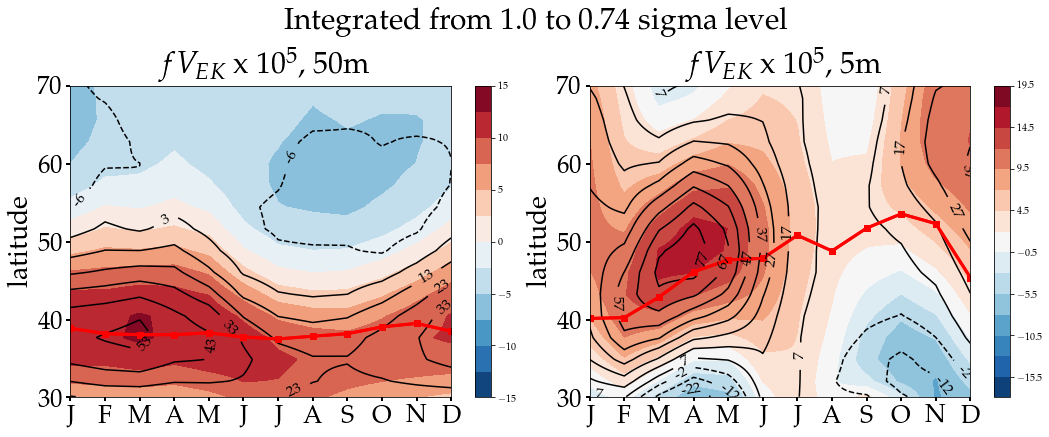

In [90]:
omega = 7.29*10**-5
f = 2*omega*np.sin(np.deg2rad(lat_a[None,:,None,None]))

# py.figure(figsize=(15,10))

l=0
plot(lev=l, field = U_a, title = "$u_{s}$", gap=2.5, ROLL=0,lin=(lat_a>30) & (lat_a<71))
py.suptitle("Surface westerlies level = %1.2f"%(sigma_full[l]/1000.0), fontsize=30, y=1.05)

l=5
plot3(lev=l, field = f*(10**5)*g*stream/(2*np.pi*np.cos(np.deg2rad(lat_a[None,:,None,None]))), \
      title = r"$f V_{EK}$ x $10^{5}$", gap1= 10, gap2=10, ROLL=0,lin=(lat_a>30) & (lat_a<71), cont=1 )
py.suptitle("Integrated from 1.0 to %1.2f sigma level"%(sigma_full[l]/1000.0), fontsize=30, y=1.05)

py.show()

In [91]:
# omega = 7.29*10**-5
# f = 2*omega*np.sin(np.deg2rad(lat_a[None,:,None,None]))
# l=5
# plot3(lev=l, field = f*(10**5)*g*stream/(U_a[:,:,0,None,:]*2*np.pi*np.cos(np.deg2rad(lat_a[None,:,None,None]))), title = r"$f V_{EK}$ x $10^{5}$", gap1= 1, gap2=1, ROLL=0,lin=(lat_a>30) & (lat_a<71) )
# py.suptitle("Integrated from 1.0 to %1.2f sigma level"%(sigma_full[l]/1000.0), fontsize=30, y=1.05)


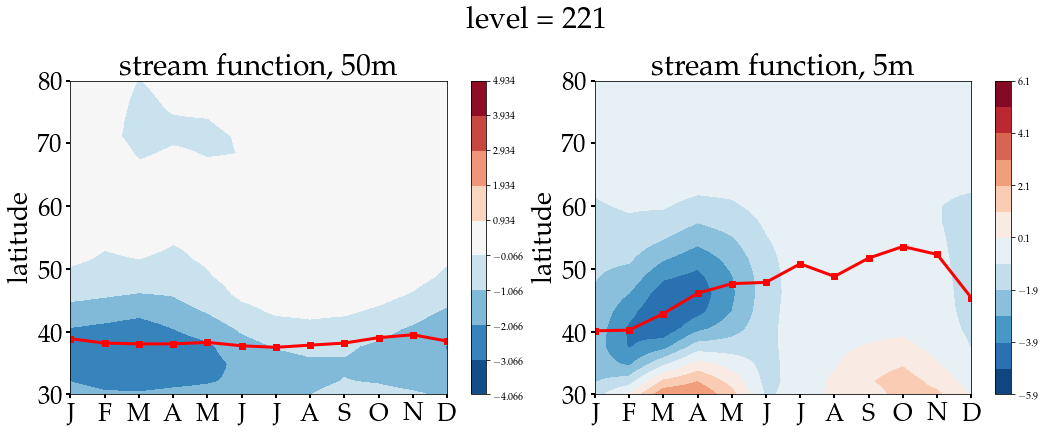

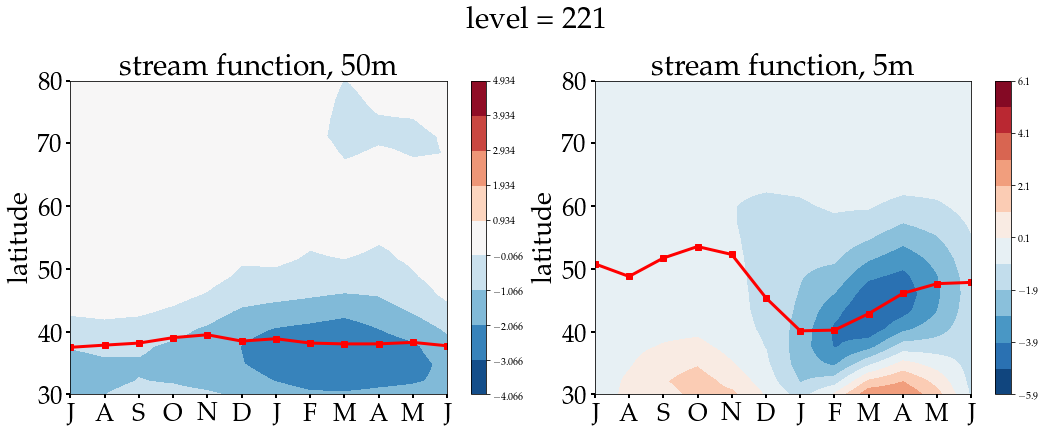

In [92]:
l=23
plot3(lev=l, field = -stream, title = "stream function", gap1= 1, gap2=1, ROLL=0,lin=(lat_a>30) & (lat_a<81) )
py.suptitle("level = %1d"%(sigma_full[l]), fontsize=30, y=1.05)

l=23
plot3(lev=l, field = -stream, title = "stream function", gap1= 1, gap2=1, ROLL=6, lin=(lat_a>30) & (lat_a<81))
py.suptitle("level = %1d"%(sigma_full[l]), fontsize=30, y=1.05)

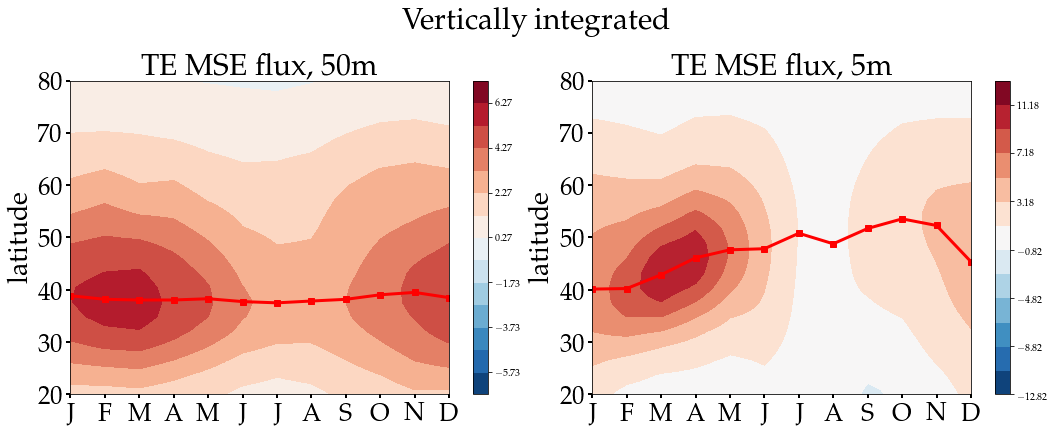

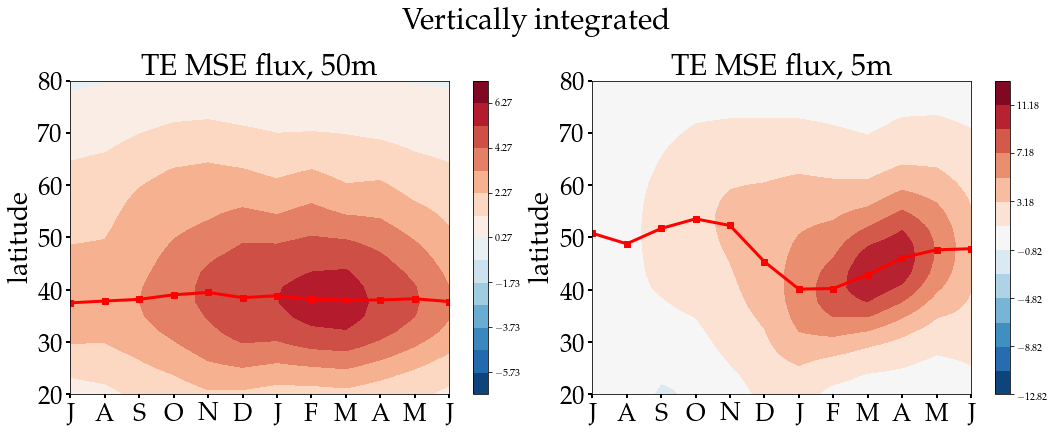

In [93]:
l=23
plot3(lev=None, field = TE_a, title = "TE MSE flux", gap1= 1, gap2=2, ROLL=0,lin=(lat_a>20) & (lat_a<81) )
py.suptitle("Vertically integrated"%(sigma_full[l]), fontsize=30, y=1.05)

l=23
plot3(lev=None, field = TE_a, title = "TE MSE flux", gap1= 1, gap2=2, ROLL=6, lin=(lat_a>20) & (lat_a<81))
py.suptitle("Vertically integrated", fontsize=30, y=1.05)

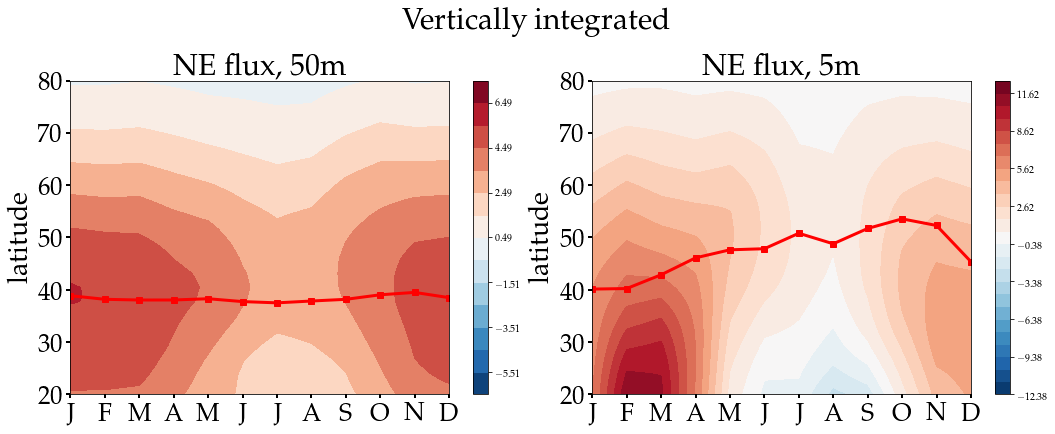

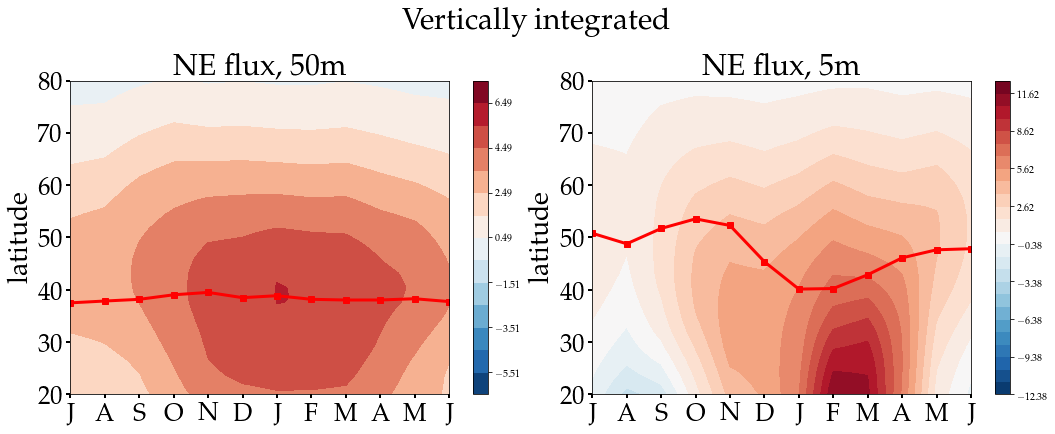

In [ ]:
l=23
plot3(lev=None, field = (TE_a+SE_a+MM_a), title = "NE flux", gap1= 1, gap2=1, ROLL=0,lin=(lat_a>20) & (lat_a<81) )
py.suptitle("Vertically integrated"%(sigma_full[l]), fontsize=30, y=1.05)

l=23
plot3(lev=None, field = (TE_a+SE_a+MM_a), title = "NE flux", gap1= 1, gap2=1, ROLL=6, lin=(lat_a>20) & (lat_a<81))
py.suptitle("Vertically integrated", fontsize=30, y=1.05)

In [ ]:
    py.figure(figsize=(15,8))
    d=0; m=2
    ax1=py.subplot(1,2,1)
    max_range = (max(  np.abs(np.min(div_T[d,:,:,:]*10**13)), np.abs(np.max(div_T[d,:,:,:]*10**13))  ) )
    py.contourf(lat_a[:], sigma_full[1:], div_T[d,:,1:,m].T*10**13, np.arange(-max_range,max_range+1,1),cmap=cm.RdBu_r);   py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis()
#     draw_MM(ax1,d,m, lin) 


    d=0; m=2
    ax1=py.subplot(1,2,2)
    max_range = (max(  np.abs(np.min(U_a[d,:,:,:])), np.abs(np.max(U_a[d,:,:,:]))  ) )
    py.contourf(lat_a[:], sigma_full[1:], U_a[d,:,1:,m].T, np.arange(-max_range,max_range+10,10),cmap=cm.RdBu_r);   py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis()
#     draw_MM(ax1,d,m, lin) 


    py.figure(figsize=(15,8))
    d=0; m=2
    ax1=py.subplot(1,2,1)
    max_range = (max(  np.abs(np.min(div_EMF[d,:,:,:]*10**13)), np.abs(np.max(div_EMF[d,:,:,:]*10**13))  ) )
    py.contourf(lat_a[:], sigma_full[1:], div_EMF[d,:,1:,m].T*10**13, np.arange(-max_range,max_range+1,1),cmap=cm.RdBu_r);   py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis()
#     draw_MM(ax1,d,m, lin) 


    d=0; m=2
    ax1=py.subplot(1,2,2)
    max_range = (max(  np.abs(np.min(TEv_a[d,:,:,:])), np.abs(np.max(TEv_a[d,:,:,:]))  ) )
    py.contourf(lat_a[:], sigma_full[1:], TEv_a[d,:,1:,m].T,cmap=cm.RdBu_r);   py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis()
#     draw_MM(ax1,d,m, lin) 
    

In [ ]:
    py.figure(figsize=(15,8))
    d=1; m=2
    ax1=py.subplot(1,2,1)
    max_range = (max(  np.abs(np.min(div_T[d,:,:,:]*10**13)), np.abs(np.max(div_T[d,:,:,:]*10**13))  ) )
    py.contourf(lat_a[:], sigma_full[1:], div_T[d,:,1:,m].T*10**13, np.arange(-max_range,max_range+1,1),cmap=cm.RdBu_r);   py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis()
#     draw_MM(ax1,d,m, lin) 


    d=1; m=2
    ax1=py.subplot(1,2,2)
    max_range = (max(  np.abs(np.min(U_a[d,:,:,:])), np.abs(np.max(U_a[d,:,:,:]))  ) )
    py.contourf(lat_a[:], sigma_full[1:], U_a[d,:,1:,m].T, np.arange(-max_range,max_range+10,10),cmap=cm.RdBu_r);   py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis()
#     draw_MM(ax1,d,m, lin) 


    py.figure(figsize=(15,8))
    d=1; m=2
    ax1=py.subplot(1,2,1)
    max_range = (max(  np.abs(np.min(div_EMF[d,:,:,:]*10**13)), np.abs(np.max(div_EMF[d,:,:,:]*10**13))  ) )
    py.contourf(lat_a[:], sigma_full[1:], div_EMF[d,:,1:,m].T*10**13, np.arange(-max_range,max_range+1,1),cmap=cm.RdBu_r);   py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis()
#     draw_MM(ax1,d,m, lin) 


    d=1; m=2
    ax1=py.subplot(1,2,2)
    max_range = (max(  np.abs(np.min(V_a[d,:,:,:])), np.abs(np.max(V_a[d,:,:,:]))  ) )
    py.contourf(lat_a[:], sigma_full[1:], V_a[d,:,1:,m].T,cmap=cm.RdBu_r);   py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis()
#     draw_MM(ax1,d,m, lin) 
    

In [ ]:
l=23
plot(lev=None, field = MM_a, title = "MM", gap=0.6)
py.suptitle("level = %1d"%(sigma_full[l]), fontsize=30, y=1.05)
py.show()

In [ ]:
sigma_full[:-10].shape

In [ ]:
py.figure(figsize=(18,5))

d=1; m=0;

py.subplot(1,3,1)
max_range = max(  np.abs(np.min(stream[d,:,:,m])), np.abs(np.max(stream[d,:,:,m]))  ) 
py.contourf(lat_a, sigma_full[1:], stream[d,:,:,m].T, np.arange(-max_range,max_range+0.04,0.04),cmap=cm.RdBu_r); py.colorbar()
py.axvline(storm_pos[d,m])
py.gca().invert_yaxis()

py.subplot(1,3,2)
max_range = (max(  np.abs(np.min(MMv_a[d,:,:,m])), np.abs(np.max(MMv_a[d,:,:,m]))  ) )
py.contourf(lat_a, sigma_full[1:], MMv_a[d,:,1:,m].T, np.arange(-max_range,max_range+0.04,0.04),cmap=cm.RdBu_r); py.colorbar()
py.axvline(storm_pos[d,m])
py.gca().invert_yaxis()

py.subplot(1,3,3)
max_range = (max(  np.abs(np.min(V_a[d,:,:,m])), np.abs(np.max(V_a[d,:,:,m]))  ) )
py.contourf(lat_a, sigma_full[1:], V_a[d,:,1:,m].T, np.arange(-max_range,max_range+0.04,0.04),cmap=cm.RdBu_r);   py.colorbar()
py.axvline(storm_pos[d,m])
py.gca().invert_yaxis()



In [ ]:
T_a.shape

In [ ]:
def draw_MM(ax,d,m,lin):
    ax2 = ax.twinx()
    ax2.plot(lat_a[lin],MM_a[d,lin,m],'r-', lw=3)
    ax2.set_ylim(-6,6)
    py.axhline(0)
#     py.xlim(0,85)

def plots(d=1,m=1,lin=(lat_a>30) & (lat_a<70)) : 
    py.figure(figsize=(15,3)) 

    ax1 =py.subplot(1,5,1)
    max_range = max(  np.abs(np.min(stream[d,lin,:,:])), np.abs(np.max(stream[d,lin,:,:]))  ) 
    py.contour(lat_a[lin], sigma_full[1:], stream[d,lin,:,m].T, 5,colors='k'); #py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis()
    draw_MM(ax1,d,m, lin)  
#     py.xlim(0,85)

    ax1=py.subplot(1,5,2)
    max_range = (max(  np.abs(np.min(MMv_a[d,lin,:,:])), np.abs(np.max(MMv_a[d,lin,:,:]))  ) )
    py.contourf(lat_a[lin], sigma_full[1:], MMv_a[d,lin,1:,m].T, np.arange(-max_range,max_range+0.04,0.04),cmap=cm.RdBu_r); py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis()    
    draw_MM(ax1,d,m, lin)  
#     py.xlim(0,85)

    ax1=py.subplot(1,5,3)
    max_range = (max(  np.abs(np.min(V_a[d,lin,:,:])), np.abs(np.max(V_a[d,lin,:,:]))  ) )
    py.contourf(lat_a[lin], sigma_full[1:], V_a[d,lin,1:,m].T, np.arange(-max_range,max_range+0.04,0.04),cmap=cm.RdBu_r);   py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis()    
    draw_MM(ax1,d,m, lin)  
#     py.xlim(0,85)

    ax1=py.subplot(1,5,4)
    max_range = (max(  np.abs(np.min(U_a[d,lin,:,:])), np.abs(np.max(U_a[d,lin,:,:]))  ) )
    py.contourf(lat_a[lin], sigma_full[1:], U_a[d,lin,1:,m].T, np.arange(-max_range,max_range+10,10),cmap=cm.RdBu_r);   py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis()
    draw_MM(ax1,d,m, lin)   
#     py.xlim(0,85)  

    ax1=py.subplot(1,5,5)
    max_range = (max(  np.abs(np.min(div_EMF[d,lin,:,:]*10**13)), np.abs(np.max(div_EMF[d,lin,:,:]*10**13))  ) )
    py.contourf(lat_a[lin], sigma_full[1:], div_EMF[d,lin,1:,m].T*10**13, np.arange(-max_range,max_range+3,3),cmap=cm.RdBu_r);   py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis()
    draw_MM(ax1,d,m, lin) 
    
    py.tight_layout()


In [ ]:
print (1) 

In [ ]:
d=1; index = (lat_a>30) & (lat_a<55)
for m in range(12):
    plots(d=d,m=m,  lin=index)

In [ ]:
d=0; index = (lat_a>30) & (lat_a<75)
for m in range(12):
    plots(d=d,m=m,  lin=index)


In [ ]:
    d=0; m=0
    ax1=py.subplot(1,1,1)
    max_range = (max(  np.abs(np.min(div_T[d,:,:,:]*10**13)), np.abs(np.max(div_T[d,:,:,:]*10**13))  ) )
    py.contourf(lat_a[:], sigma_full[1:], div_T[d,:,1:,m].T*10**13, np.arange(-max_range,max_range+1,1),cmap=cm.RdBu_r);   py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis()
#     draw_MM(ax1,d,m, lin) 
    

In [ ]:
    d=0; m=0
    ax1=py.subplot(1,1,1)
    max_range = (max(  np.abs(np.min(div_T[d,:,:,:]*10**13)), np.abs(np.max(div_T[d,:,:,:]*10**13))  ) )
    py.contourf(lat_a[:], sigma_full[1:], div_T[d,:,1:,m].T*10**13, np.arange(-max_range,max_range+1,1),cmap=cm.RdBu_r);   py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis()
#     draw_MM(ax1,d,m, lin) 
    

In [ ]:
stream.shape

In [ ]:
lin=(lat_a>30) & (lat_a<70)
d=0
for m in range(12):
    py.figure(figsize=(18,3))
    ax1=py.subplot(1,4,1)
    max_range = (max(  np.abs(np.min(div_EMF[d,lin,:,:]*10**13)), np.abs(np.max(div_EMF[d,lin,:,:]*10**13))  ) )
    py.contourf(lat_a[lin], sigma_full[1:], div_EMF[d,lin,1:,m].T*10**13, np.arange(-max_range,max_range+5,5),cmap=cm.RdBu_r);   py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis()
#     draw_MM(ax1,d,m, lin) 


    ax1=py.subplot(1,4,2)
    max_range = (max(  np.abs(np.min(TEv_a[d,lin,:,:])), np.abs(np.max(TEv_a[d,:,:,:]))  ) )
    py.contourf(lat_a[lin], sigma_full[1:], TEv_a[d,lin,1:,m].T,np.arange(-max_range,max_range+0.2,0.2),cmap=cm.RdBu_r);   py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis()
#     draw_MM(ax1,d,m, lin) 

    ax1=py.subplot(1,4,3)
    max_range = (max(  np.abs(np.min(U_a[d,lin,:,:])), np.abs(np.max(U_a[d,lin,:,:]))  ) )
    py.contourf(lat_a[lin], sigma_full[1:], U_a[d,lin,1:,m].T,np.arange(-max_range,max_range+10,10),cmap=cm.RdBu_r);   py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis()
     
    ax1=py.subplot(1,4,4)
    max_range = (max(  np.abs(np.min(stream[d,lin,:,:])), np.abs(np.max(stream[d,lin,:,:]))  ) )
    c = py.contour(lat_a[lin], sigma_full[1:], -stream[d,lin,:,m].T, np.arange(-max_range,max_range+1,1), colors='k');   #py.colorbar()
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=15,fontsize=15)
    max_range = (max(  np.abs(np.min(MMv_a[d,lin,1:,:])), np.abs(np.max(MMv_a[d,lin,1:,:]))  ) )
    py.contourf(lat_a[lin], sigma_full[1:], MMv_a[d,lin,1:,m].T, np.arange(-max_range,max_range+2,2), cmap=cm.RdBu_r);  py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis()    
#     draw_MM(ax1,d,m, lin) 

In [ ]:

lin=(lat_a>30) & (lat_a<70)
d=0
for m in range(12):
    py.figure(figsize=(18,3))
    ax1=py.subplot(1,4,1)
    max_range = (max(  np.abs(np.min(div_EMF[d,lin,:,:]*10**13)), np.abs(np.max(div_EMF[d,lin,:,:]*10**13))  ) )
    py.contourf(lat_a[lin], sigma_full[1:], div_EMF[d,lin,1:,m].T*10**13, np.arange(-max_range,max_range+5,5),cmap=cm.RdBu_r);   py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis()
#     draw_MM(ax1,d,m, lin) 

    ax1=py.subplot(1,4,2)
    MSE_a = (Cp*T_a+g*Z_a+L*Q_a)/10**5
    max_range = (max(  np.abs(np.min(stream[d,lin,:,:])), np.abs(np.max(stream[d,lin,:,:]))  ) )
    c = py.contour(lat_a[lin], sigma_full[1:], -stream[d,lin,:,m].T, np.arange(-max_range,max_range+1,1), colors='k');   #py.colorbar()
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=15,fontsize=15)
    max_range = (max(  np.abs(np.min(MSE_a[d,lin,1:,:])), np.abs(np.max(MSE_a[d,lin,1:,:]))  ) )
    py.contourf(lat_a[lin], sigma_full[1:], MSE_a[d,lin,1:,m].T, np.arange(3,np.max(MSE_a[d,lin,1:,:])+0.1,0.1), cmap=cm.Reds);  py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis() 
#     draw_MM(ax1,d,m, lin) 

    ax1=py.subplot(1,4,3)
    max_range = (max(  np.abs(np.min(stream[d,lin,:,:])), np.abs(np.max(stream[d,lin,:,:]))  ) )
    c = py.contour(lat_a[lin], sigma_full[1:], -stream[d,lin,:,m].T, np.arange(-max_range,max_range+1,1), colors='k');   #py.colorbar()
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=15,fontsize=15)
    max_range = (max(  np.abs(np.min(V_a[d,lin,1:,:])), np.abs(np.max(V_a[d,lin,1:,:]))  ) )
    py.contourf(lat_a[lin], sigma_full[1:], V_a[d,lin,1:,m].T, np.arange(-max_range,max_range+1,1), cmap=cm.RdBu_r);  py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis() 
     
    ax1=py.subplot(1,4,4)
    max_range = (max(  np.abs(np.min(stream[d,lin,:,:])), np.abs(np.max(stream[d,lin,:,:]))  ) )
    c = py.contour(lat_a[lin], sigma_full[1:], -stream[d,lin,:,m].T, np.arange(-max_range,max_range+1,1), colors='k');   #py.colorbar()
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=15,fontsize=15)
    max_range = (max(  np.abs(np.min(MMv_a[d,lin,1:,:])), np.abs(np.max(MMv_a[d,lin,1:,:]))  ) )
    py.contourf(lat_a[lin], sigma_full[1:], MMv_a[d,lin,1:,m].T, np.arange(-max_range,max_range+2,2), cmap=cm.RdBu_r);  py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis()    
#     draw_MM(ax1,d,m, lin) 

In [ ]:
lin=(lat_a>30) & (lat_a<70)
d=1
for m in range(12):
    py.figure(figsize=(18,3))
    ax1=py.subplot(1,4,1)
    max_range = (max(  np.abs(np.min(div_EMF[d,lin,:,:]*10**13)), np.abs(np.max(div_EMF[d,lin,:,:]*10**13))  ) )
    py.contourf(lat_a[lin], sigma_full[1:], div_EMF[d,lin,1:,m].T*10**13, np.arange(-max_range,max_range+5,5),cmap=cm.RdBu_r);   py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis()
#     draw_MM(ax1,d,m, lin) 


    ax1=py.subplot(1,4,2)
    max_range = (max(  np.abs(np.min(TEv_a[d,lin,:,:])), np.abs(np.max(TEv_a[d,:,:,:]))  ) )
    py.contourf(lat_a[lin], sigma_full[1:], TEv_a[d,lin,1:,m].T,np.arange(-max_range,max_range+0.2,0.2),cmap=cm.RdBu_r);   py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis()
#     draw_MM(ax1,d,m, lin) 

    ax1=py.subplot(1,4,3)
    max_range = (max(  np.abs(np.min(U_a[d,lin,:,:])), np.abs(np.max(U_a[d,lin,:,:]))  ) )
    py.contourf(lat_a[lin], sigma_full[1:], U_a[d,lin,1:,m].T,np.arange(-max_range,max_range+10,10),cmap=cm.RdBu_r);   py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis()
     
    ax1=py.subplot(1,4,4)
    max_range = (max(  np.abs(np.min(stream[d,lin,:,:])), np.abs(np.max(stream[d,lin,:,:]))  ) )
    c = py.contour(lat_a[lin], sigma_full[1:], -stream[d,lin,:,m].T, np.arange(-max_range,max_range+1,1), colors='k');   #py.colorbar()
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=15,fontsize=15)
    max_range = (max(  np.abs(np.min(MMv_a[d,lin,1:,:])), np.abs(np.max(MMv_a[d,lin,1:,:]))  ) )
    py.contourf(lat_a[lin], sigma_full[1:], MMv_a[d,lin,1:,m].T, np.arange(-max_range,max_range+2,2), cmap=cm.RdBu_r);  py.colorbar()
    py.axvline(storm_pos[d,m])
    py.gca().invert_yaxis()    
#     draw_MM(ax1,d,m, lin) 